# Regression - FFNN - one_hot + normalize

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
scaler = StandardScaler()
scaler.fit(X[:,3:])

X_train_scaled = scaler.transform(X_train[:,3:])
X_test_scaled = scaler.transform(X_test[:,3:])

In [15]:
X_train_scaled = np.concatenate((X_train[:,:3], X_train_scaled), axis=1)
X_test_scaled = np.concatenate((X_test[:,:3], X_test_scaled), axis=1)

## Build Model

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

In [17]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [18]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 452us/sample - loss: 85.2451 - mae: 8.5440 - coeff: -7.6603 - val_loss: 53.9077 - val_mae: 6.4215 - val_coeff: -4.0038
Epoch 2/100
3341/3341 [==============================] - 0s 61us/sample - loss: 34.6458 - mae: 4.7417 - coeff: -2.4498 - val_loss: 22.5988 - val_mae: 3.7554 - val_coeff: -1.0536
Epoch 3/100
3341/3341 [==============================] - 0s 85us/sample - loss: 19.4225 - mae: 2.9693 - coeff: -0.9351 - val_loss: 10.8035 - val_mae: 2.3474 - val_coeff: 0.0195
Epoch 4/100
3341/3341 [==============================] - 0s 60us/sample - loss: 10.5370 - mae: 1.9853 - coeff: -0.0405 - val_loss: 7.0178 - val_mae: 1.8039 - val_coeff: 0.3656
Epoch 5/100
3341/3341 [==============================] - 0s 64us/sample - loss: 8.0175 - mae: 1.7388 - coeff: 0.2487 - val_loss: 5.8376 - val_mae: 1.6787 - val_coeff: 0.4740
Epoch 6/100
3341/3341 [==============================] - 0s 56us/samp

3341/3341 [==============================] - 0s 86us/sample - loss: 4.1667 - mae: 1.4703 - coeff: 0.5813 - val_loss: 4.6064 - val_mae: 1.4856 - val_coeff: 0.5811
Epoch 48/100
3341/3341 [==============================] - 0s 90us/sample - loss: 4.1327 - mae: 1.4434 - coeff: 0.5781 - val_loss: 4.5655 - val_mae: 1.4993 - val_coeff: 0.5840
Epoch 49/100
3341/3341 [==============================] - 0s 69us/sample - loss: 4.1190 - mae: 1.4402 - coeff: 0.5957 - val_loss: 4.4985 - val_mae: 1.5135 - val_coeff: 0.5895
Epoch 50/100
3341/3341 [==============================] - 0s 98us/sample - loss: 4.2526 - mae: 1.4678 - coeff: 0.5825 - val_loss: 4.7022 - val_mae: 1.4927 - val_coeff: 0.5732
Epoch 51/100
3341/3341 [==============================] - 0s 88us/sample - loss: 4.1203 - mae: 1.4424 - coeff: 0.5931 - val_loss: 4.5895 - val_mae: 1.4924 - val_coeff: 0.5825
Epoch 52/100
3341/3341 [==============================] - 0s 67us/sample - loss: 4.1037 - mae: 1.4390 - coeff: 0.5974 - val_loss: 4.5349 -

Epoch 94/100
3341/3341 [==============================] - 0s 51us/sample - loss: 3.9961 - mae: 1.4231 - coeff: 0.5852 - val_loss: 4.5603 - val_mae: 1.4923 - val_coeff: 0.5863
Epoch 95/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1122 - mae: 1.4621 - coeff: 0.5832 - val_loss: 4.4769 - val_mae: 1.4951 - val_coeff: 0.5923
Epoch 96/100
3341/3341 [==============================] - 0s 73us/sample - loss: 3.9647 - mae: 1.4284 - coeff: 0.5949 - val_loss: 4.6785 - val_mae: 1.4964 - val_coeff: 0.5758
Epoch 97/100
3341/3341 [==============================] - 0s 58us/sample - loss: 3.9382 - mae: 1.4101 - coeff: 0.5998 - val_loss: 4.7218 - val_mae: 1.4998 - val_coeff: 0.5724
Epoch 98/100
3341/3341 [==============================] - 0s 67us/sample - loss: 3.9588 - mae: 1.4253 - coeff: 0.5922 - val_loss: 4.7094 - val_mae: 1.5064 - val_coeff: 0.5721
Epoch 99/100
3341/3341 [==============================] - 0s 54us/sample - loss: 3.9558 - mae: 1.4169 - coeff: 0.6136 - val_l

In [21]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [22]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.756971059251187
RMSE :      2.1810481561054966
r2_score :  0.5760901286769156


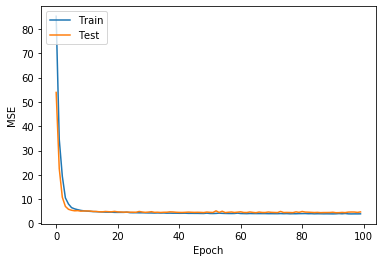

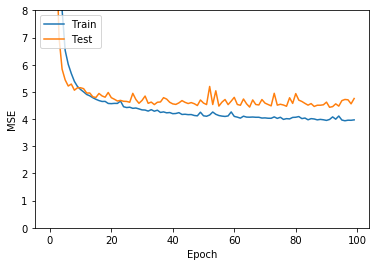

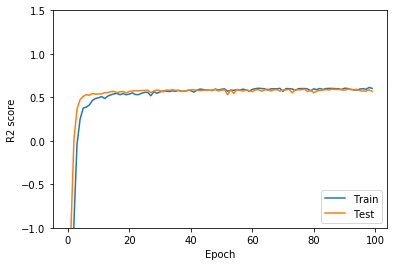

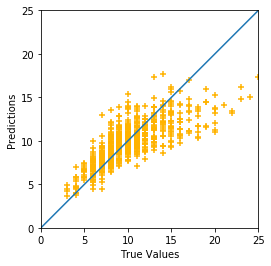

In [23]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 2

## Build Model

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [26]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [28]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 229us/sample - loss: 84.9668 - mae: 8.5391 - coeff: -7.4043 - val_loss: 51.5967 - val_mae: 6.2819 - val_coeff: -3.7932
Epoch 2/300
3341/3341 [==============================] - 0s 56us/sample - loss: 30.1986 - mae: 4.3882 - coeff: -1.9952 - val_loss: 20.1417 - val_mae: 3.5364 - val_coeff: -0.8300
Epoch 3/300
3341/3341 [==============================] - 0s 58us/sample - loss: 16.4457 - mae: 2.8290 - coeff: -0.5705 - val_loss: 9.1918 - val_mae: 2.2026 - val_coeff: 0.1677
Epoch 4/300
3341/3341 [==============================] - 0s 52us/sample - loss: 8.9080 - mae: 1.8565 - coeff: 0.1400 - val_loss: 5.8173 - val_mae: 1.7209 - val_coeff: 0.4754
Epoch 5/300
3341/3341 [==============================] - 0s 59us/sample - loss: 6.6023 - mae: 1.6438 - coeff: 0.3597 - val_loss: 5.4328 - val_mae: 1.6463 - val_coeff: 0.5082
Epoch 6/300
3341/3341 [==============================] - 0s 68us/sample 

3341/3341 [==============================] - 0s 79us/sample - loss: 4.0741 - mae: 1.4319 - coeff: 0.5885 - val_loss: 4.7072 - val_mae: 1.5044 - val_coeff: 0.5741
Epoch 48/300
3341/3341 [==============================] - 0s 88us/sample - loss: 4.1001 - mae: 1.4352 - coeff: 0.5867 - val_loss: 4.6107 - val_mae: 1.5459 - val_coeff: 0.5803
Epoch 49/300
3341/3341 [==============================] - 0s 81us/sample - loss: 4.1343 - mae: 1.4563 - coeff: 0.5820 - val_loss: 4.6913 - val_mae: 1.4950 - val_coeff: 0.5760
Epoch 50/300
3341/3341 [==============================] - 0s 62us/sample - loss: 4.1152 - mae: 1.4567 - coeff: 0.5957 - val_loss: 4.7816 - val_mae: 1.5045 - val_coeff: 0.5673
Epoch 51/300
3341/3341 [==============================] - 0s 66us/sample - loss: 4.0912 - mae: 1.4355 - coeff: 0.5977 - val_loss: 4.7155 - val_mae: 1.4956 - val_coeff: 0.5734
Epoch 52/300
3341/3341 [==============================] - 0s 76us/sample - loss: 4.1057 - mae: 1.4423 - coeff: 0.5943 - val_loss: 4.5721 -

Epoch 94/300
3341/3341 [==============================] - 0s 92us/sample - loss: 4.0085 - mae: 1.4380 - coeff: 0.6015 - val_loss: 4.6542 - val_mae: 1.4940 - val_coeff: 0.5797
Epoch 95/300
3341/3341 [==============================] - 0s 78us/sample - loss: 3.9472 - mae: 1.4333 - coeff: 0.6000 - val_loss: 4.8746 - val_mae: 1.5138 - val_coeff: 0.5600
Epoch 96/300
3341/3341 [==============================] - 0s 57us/sample - loss: 3.9465 - mae: 1.4171 - coeff: 0.6057 - val_loss: 5.2890 - val_mae: 1.5714 - val_coeff: 0.5246
Epoch 97/300
3341/3341 [==============================] - 0s 53us/sample - loss: 3.9995 - mae: 1.4406 - coeff: 0.6021 - val_loss: 4.9070 - val_mae: 1.5092 - val_coeff: 0.5578
Epoch 98/300
3341/3341 [==============================] - 0s 89us/sample - loss: 3.9518 - mae: 1.4091 - coeff: 0.6133 - val_loss: 4.5365 - val_mae: 1.5090 - val_coeff: 0.5875
Epoch 99/300
3341/3341 [==============================] - 0s 58us/sample - loss: 3.9627 - mae: 1.4188 - coeff: 0.6038 - val_l

3341/3341 [==============================] - 0s 47us/sample - loss: 3.8426 - mae: 1.4032 - coeff: 0.5981 - val_loss: 4.8249 - val_mae: 1.5008 - val_coeff: 0.5657
Epoch 141/300
3341/3341 [==============================] - 0s 44us/sample - loss: 3.9637 - mae: 1.4286 - coeff: 0.5964 - val_loss: 4.7627 - val_mae: 1.5893 - val_coeff: 0.5676
Epoch 142/300
3341/3341 [==============================] - 0s 55us/sample - loss: 3.8651 - mae: 1.4045 - coeff: 0.6185 - val_loss: 4.6164 - val_mae: 1.5157 - val_coeff: 0.5808
Epoch 143/300
3341/3341 [==============================] - 0s 46us/sample - loss: 3.8862 - mae: 1.4021 - coeff: 0.6170 - val_loss: 4.6259 - val_mae: 1.5386 - val_coeff: 0.5796
Epoch 144/300
3341/3341 [==============================] - 0s 51us/sample - loss: 3.8444 - mae: 1.4002 - coeff: 0.6242 - val_loss: 4.7427 - val_mae: 1.5050 - val_coeff: 0.5717
Epoch 145/300
3341/3341 [==============================] - 0s 43us/sample - loss: 3.8060 - mae: 1.4034 - coeff: 0.6263 - val_loss: 4.6

3341/3341 [==============================] - 0s 65us/sample - loss: 3.7060 - mae: 1.3849 - coeff: 0.6337 - val_loss: 4.8886 - val_mae: 1.5019 - val_coeff: 0.5598
Epoch 187/300
3341/3341 [==============================] - 0s 96us/sample - loss: 3.6809 - mae: 1.3761 - coeff: 0.6362 - val_loss: 4.6877 - val_mae: 1.4921 - val_coeff: 0.5761
Epoch 188/300
3341/3341 [==============================] - 0s 71us/sample - loss: 3.6893 - mae: 1.3807 - coeff: 0.6378 - val_loss: 4.9525 - val_mae: 1.5214 - val_coeff: 0.5537
Epoch 189/300
3341/3341 [==============================] - 0s 56us/sample - loss: 3.6992 - mae: 1.3810 - coeff: 0.6318 - val_loss: 4.8093 - val_mae: 1.5004 - val_coeff: 0.5646
Epoch 190/300
3341/3341 [==============================] - 0s 88us/sample - loss: 3.6606 - mae: 1.3715 - coeff: 0.6383 - val_loss: 4.7441 - val_mae: 1.5038 - val_coeff: 0.5715
Epoch 191/300
3341/3341 [==============================] - 0s 83us/sample - loss: 3.7038 - mae: 1.3844 - coeff: 0.6367 - val_loss: 5.1

3341/3341 [==============================] - 0s 58us/sample - loss: 3.5448 - mae: 1.3572 - coeff: 0.6505 - val_loss: 4.7362 - val_mae: 1.5210 - val_coeff: 0.5709
Epoch 233/300
3341/3341 [==============================] - 0s 72us/sample - loss: 3.5698 - mae: 1.3669 - coeff: 0.6484 - val_loss: 4.6776 - val_mae: 1.5079 - val_coeff: 0.5760
Epoch 234/300
3341/3341 [==============================] - 0s 60us/sample - loss: 3.5340 - mae: 1.3548 - coeff: 0.6252 - val_loss: 4.8565 - val_mae: 1.5086 - val_coeff: 0.5625
Epoch 235/300
3341/3341 [==============================] - 0s 66us/sample - loss: 3.5017 - mae: 1.3389 - coeff: 0.6571 - val_loss: 4.8231 - val_mae: 1.5206 - val_coeff: 0.5626
Epoch 236/300
3341/3341 [==============================] - 0s 78us/sample - loss: 3.5327 - mae: 1.3487 - coeff: 0.6178 - val_loss: 4.8662 - val_mae: 1.5087 - val_coeff: 0.5618
Epoch 237/300
3341/3341 [==============================] - 0s 73us/sample - loss: 3.4848 - mae: 1.3447 - coeff: 0.6234 - val_loss: 4.8

3341/3341 [==============================] - 0s 102us/sample - loss: 3.4097 - mae: 1.3338 - coeff: 0.6503 - val_loss: 4.8117 - val_mae: 1.5157 - val_coeff: 0.5668
Epoch 279/300
3341/3341 [==============================] - 0s 86us/sample - loss: 3.3203 - mae: 1.3138 - coeff: 0.6704 - val_loss: 4.9539 - val_mae: 1.5233 - val_coeff: 0.5541
Epoch 280/300
3341/3341 [==============================] - 0s 67us/sample - loss: 3.4444 - mae: 1.3473 - coeff: 0.6455 - val_loss: 4.8662 - val_mae: 1.5154 - val_coeff: 0.5610
Epoch 281/300
3341/3341 [==============================] - 0s 84us/sample - loss: 3.4682 - mae: 1.3592 - coeff: 0.6519 - val_loss: 4.7587 - val_mae: 1.5496 - val_coeff: 0.5680
Epoch 282/300
3341/3341 [==============================] - 0s 108us/sample - loss: 3.4819 - mae: 1.3744 - coeff: 0.6490 - val_loss: 4.9655 - val_mae: 1.5296 - val_coeff: 0.5525 loss: 3.5902 - mae: 1.3951 - coeff: 0.63
Epoch 283/300
3341/3341 [==============================] - 0s 84us/sample - loss: 3.3817 - 

In [29]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [30]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.94789715765148
RMSE :      2.2243869172541633
r2_score :  0.5590760546375778


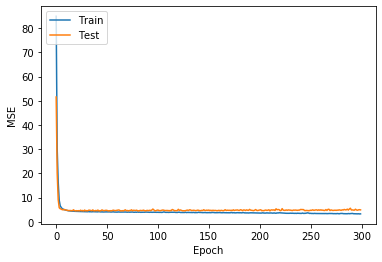

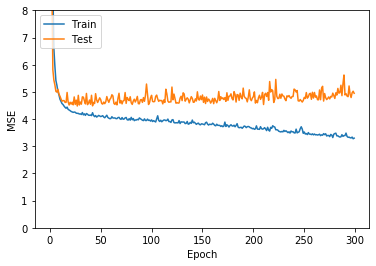

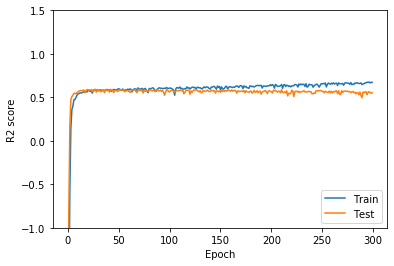

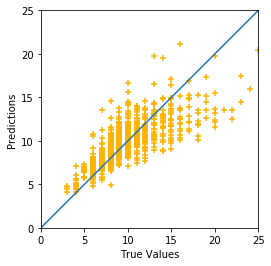

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 3

## Build Model

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [34]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 44,065
Trainable params: 44,065
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 250us/sample - loss: 57.3238 - mae: 6.4486 - coeff: -4.6952 - val_loss: 20.2338 - val_mae: 3.4359 - val_coeff: -0.8359
Epoch 2/100
3341/3341 [==============================] - 0s 59us/sample - loss: 13.0008 - mae: 2.5746 - coeff: -0.2937 - val_loss: 6.5347 - val_mae: 1.8452 - val_coeff: 0.4105
Epoch 3/100
3341/3341 [==============================] - 0s 62us/sample - loss: 6.6238 - mae: 1.7028 - coeff: 0.3056 - val_loss: 5.7592 - val_mae: 1.7009 - val_coeff: 0.4797
Epoch 4/100
3341/3341 [==============================] - 0s 60us/sample - loss: 5.6130 - mae: 1.6507 - coeff: 0.4373 - val_loss: 5.2522 - val_mae: 1.6198 - val_coeff: 0.5257
Epoch 5/100
3341/3341 [==============================] - 0s 69us/sample - loss: 5.1304 - mae: 1.5710 - coeff: 0.4782 - val_loss: 4.9410 - val_mae: 1.5882 - val_coeff: 0.5527
Epoch 6/100
3341/3341 [==============================] - 0s 58us/sample - lo

3341/3341 [==============================] - 0s 73us/sample - loss: 4.0243 - mae: 1.4295 - coeff: 0.6008 - val_loss: 4.5374 - val_mae: 1.4945 - val_coeff: 0.5890
Epoch 48/100
3341/3341 [==============================] - 0s 69us/sample - loss: 4.0075 - mae: 1.4260 - coeff: 0.5976 - val_loss: 4.6097 - val_mae: 1.4960 - val_coeff: 0.5836
Epoch 49/100
3341/3341 [==============================] - 0s 63us/sample - loss: 3.9268 - mae: 1.4186 - coeff: 0.6086 - val_loss: 5.0834 - val_mae: 1.5392 - val_coeff: 0.5417
Epoch 50/100
3341/3341 [==============================] - 0s 72us/sample - loss: 3.9903 - mae: 1.4285 - coeff: 0.6032 - val_loss: 4.8221 - val_mae: 1.6497 - val_coeff: 0.5579
Epoch 51/100
3341/3341 [==============================] - 0s 71us/sample - loss: 4.0855 - mae: 1.4605 - coeff: 0.5893 - val_loss: 4.8784 - val_mae: 1.5416 - val_coeff: 0.5601
Epoch 52/100
3341/3341 [==============================] - 0s 65us/sample - loss: 3.9312 - mae: 1.4139 - coeff: 0.6027 - val_loss: 4.7508 -

3341/3341 [==============================] - 0s 63us/sample - loss: 3.6211 - mae: 1.3728 - coeff: 0.6382 - val_loss: 4.7881 - val_mae: 1.5217 - val_coeff: 0.5692
Epoch 94/100
3341/3341 [==============================] - 0s 66us/sample - loss: 3.6506 - mae: 1.3749 - coeff: 0.6348 - val_loss: 4.8476 - val_mae: 1.6635 - val_coeff: 0.5583
Epoch 95/100
3341/3341 [==============================] - 0s 75us/sample - loss: 3.9327 - mae: 1.4493 - coeff: 0.6143 - val_loss: 4.8843 - val_mae: 1.5404 - val_coeff: 0.5619
Epoch 96/100
3341/3341 [==============================] - 0s 62us/sample - loss: 3.6399 - mae: 1.3713 - coeff: 0.6359 - val_loss: 5.5095 - val_mae: 1.6161 - val_coeff: 0.5056
Epoch 97/100
3341/3341 [==============================] - 0s 72us/sample - loss: 3.7072 - mae: 1.3862 - coeff: 0.6308 - val_loss: 4.8748 - val_mae: 1.5181 - val_coeff: 0.5627
Epoch 98/100
3341/3341 [==============================] - 0s 66us/sample - loss: 3.5916 - mae: 1.3590 - coeff: 0.6474 - val_loss: 4.6482 -

In [37]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [38]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.930830127149677
RMSE :      2.2205472584814934
r2_score :  0.5605969557769312


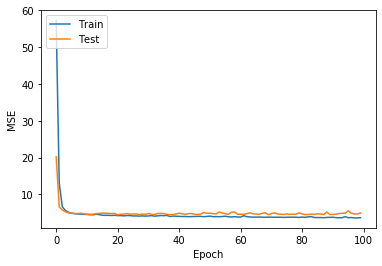

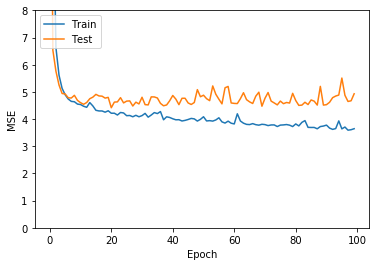

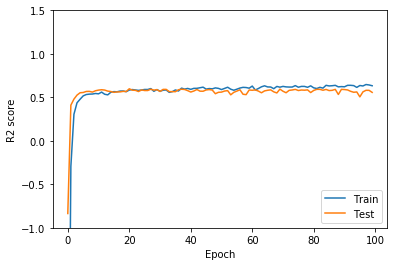

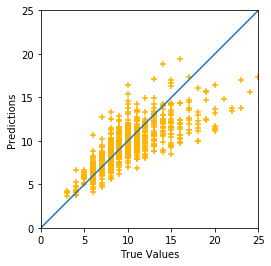

In [39]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 4

## Build Model

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [41]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [42]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [44]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 286us/sample - loss: 77.5784 - mae: 8.0373 - coeff: -7.0269 - val_loss: 41.6665 - val_mae: 5.5024 - val_coeff: -2.8635
Epoch 2/100
3341/3341 [==============================] - 0s 83us/sample - loss: 28.9835 - mae: 4.2264 - coeff: -1.9662 - val_loss: 20.4681 - val_mae: 3.5746 - val_coeff: -0.8610
Epoch 3/100
3341/3341 [==============================] - 0s 75us/sample - loss: 16.4457 - mae: 2.9251 - coeff: -0.6447 - val_loss: 10.4275 - val_mae: 2.3646 - val_coeff: 0.0646
Epoch 4/100
3341/3341 [==============================] - 0s 64us/sample - loss: 9.6761 - mae: 2.1121 - coeff: 0.0578 - val_loss: 6.9357 - val_mae: 1.8614 - val_coeff: 0.3814
Epoch 5/100
3341/3341 [==============================] - 0s 65us/sample - loss: 6.7849 - mae: 1.7506 - coeff: 0.3386 - val_loss: 5.9783 - val_mae: 1.6820 - val_coeff: 0.4654
Epoch 6/100
3341/3341 [==============================] - 0s 80us/sample

3341/3341 [==============================] - 0s 53us/sample - loss: 4.1178 - mae: 1.4521 - coeff: 0.5583 - val_loss: 4.9874 - val_mae: 1.5248 - val_coeff: 0.5504
Epoch 48/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.1848 - mae: 1.4523 - coeff: 0.5874 - val_loss: 4.4608 - val_mae: 1.4940 - val_coeff: 0.5967
Epoch 49/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.1005 - mae: 1.4353 - coeff: 0.5891 - val_loss: 4.4698 - val_mae: 1.4788 - val_coeff: 0.5955
Epoch 50/100
3341/3341 [==============================] - 0s 48us/sample - loss: 4.0882 - mae: 1.4400 - coeff: 0.5809 - val_loss: 4.5092 - val_mae: 1.4877 - val_coeff: 0.5926
Epoch 51/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1416 - mae: 1.4549 - coeff: 0.5736 - val_loss: 4.9860 - val_mae: 1.5297 - val_coeff: 0.5506
Epoch 52/100
3341/3341 [==============================] - 0s 63us/sample - loss: 4.2186 - mae: 1.4661 - coeff: 0.5691 - val_loss: 4.5493 -

Epoch 94/100
3341/3341 [==============================] - 0s 54us/sample - loss: 3.9871 - mae: 1.4301 - coeff: 0.5989 - val_loss: 4.6545 - val_mae: 1.4888 - val_coeff: 0.5794
Epoch 95/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.9505 - mae: 1.4188 - coeff: 0.6079 - val_loss: 4.7255 - val_mae: 1.4930 - val_coeff: 0.5739
Epoch 96/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.0007 - mae: 1.4259 - coeff: 0.5949 - val_loss: 5.0307 - val_mae: 1.5219 - val_coeff: 0.5477
Epoch 97/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.0133 - mae: 1.4340 - coeff: 0.5991 - val_loss: 4.7610 - val_mae: 1.5298 - val_coeff: 0.5693
Epoch 98/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.0846 - mae: 1.4397 - coeff: 0.5945 - val_loss: 4.5308 - val_mae: 1.4784 - val_coeff: 0.5906
Epoch 99/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.9891 - mae: 1.4223 - coeff: 0.6042 - val_l

In [45]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [46]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.493493173706201
RMSE :      2.1197861150847745
r2_score :  0.5995695392444111


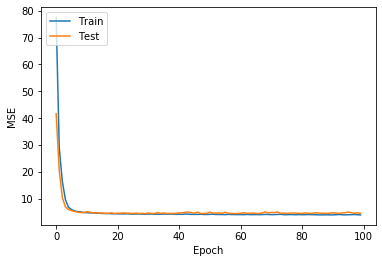

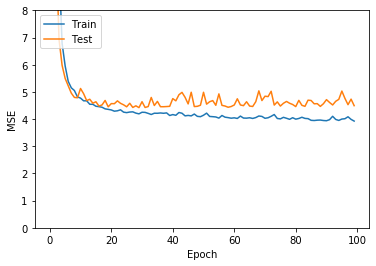

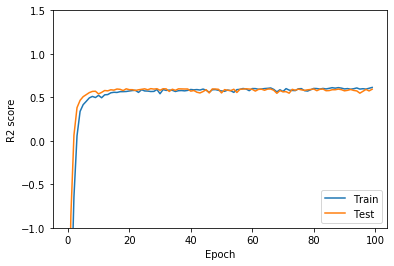

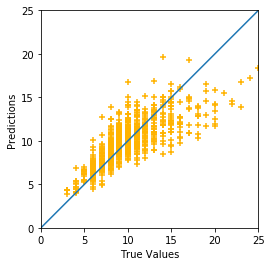

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 5

## Build Model

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [50]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_24 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


In [52]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 420us/sample - loss: 77.6573 - mae: 8.0668 - coeff: -6.7546 - val_loss: 35.3750 - val_mae: 4.9569 - val_coeff: -2.2744
Epoch 2/100
3341/3341 [==============================] - 0s 70us/sample - loss: 25.4474 - mae: 3.8896 - coeff: -1.5732 - val_loss: 18.2961 - val_mae: 3.2940 - val_coeff: -0.6648
Epoch 3/100
3341/3341 [==============================] - 0s 69us/sample - loss: 13.4034 - mae: 2.6442 - coeff: -0.3101 - val_loss: 9.0877 - val_mae: 2.1348 - val_coeff: 0.1801
Epoch 4/100
3341/3341 [==============================] - 0s 79us/sample - loss: 7.6808 - mae: 1.8925 - coeff: 0.2662 - val_loss: 6.5471 - val_mae: 1.7654 - val_coeff: 0.4068
Epoch 5/100
3341/3341 [==============================] - 0s 106us/sample - loss: 6.0930 - mae: 1.7160 - coeff: 0.4056 - val_loss: 6.2322 - val_mae: 1.7204 - val_coeff: 0.4345
Epoch 6/100
3341/3341 [==============================] - ETA: 0s - loss

3341/3341 [==============================] - 0s 68us/sample - loss: 4.3087 - mae: 1.4891 - coeff: 0.5663 - val_loss: 4.7008 - val_mae: 1.5102 - val_coeff: 0.5754
Epoch 48/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.1100 - mae: 1.4395 - coeff: 0.5867 - val_loss: 4.5332 - val_mae: 1.5218 - val_coeff: 0.5887
Epoch 49/100
3341/3341 [==============================] - 0s 57us/sample - loss: 4.0736 - mae: 1.4483 - coeff: 0.5979 - val_loss: 5.2228 - val_mae: 1.5749 - val_coeff: 0.5294
Epoch 50/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.1162 - mae: 1.4493 - coeff: 0.5923 - val_loss: 4.6304 - val_mae: 1.4992 - val_coeff: 0.5821
Epoch 51/100
3341/3341 [==============================] - 0s 56us/sample - loss: 4.0484 - mae: 1.4302 - coeff: 0.5933 - val_loss: 4.6953 - val_mae: 1.6187 - val_coeff: 0.5719
Epoch 52/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.4724 - mae: 1.5394 - coeff: 0.5484 - val_loss: 4.6595 -

Epoch 94/100
3341/3341 [==============================] - 0s 78us/sample - loss: 3.8712 - mae: 1.4051 - coeff: 0.6130 - val_loss: 4.7124 - val_mae: 1.5803 - val_coeff: 0.5732
Epoch 95/100
3341/3341 [==============================] - 0s 56us/sample - loss: 3.9220 - mae: 1.4209 - coeff: 0.6072 - val_loss: 4.7254 - val_mae: 1.5121 - val_coeff: 0.5757
Epoch 96/100
3341/3341 [==============================] - 0s 78us/sample - loss: 3.8527 - mae: 1.3942 - coeff: 0.6232 - val_loss: 4.6360 - val_mae: 1.5123 - val_coeff: 0.5832
Epoch 97/100
3341/3341 [==============================] - 0s 94us/sample - loss: 3.8651 - mae: 1.4021 - coeff: 0.5999 - val_loss: 4.6610 - val_mae: 1.5073 - val_coeff: 0.5811
Epoch 98/100
3341/3341 [==============================] - 0s 60us/sample - loss: 3.9003 - mae: 1.4139 - coeff: 0.5953 - val_loss: 4.5543 - val_mae: 1.5154 - val_coeff: 0.5896
Epoch 99/100
3341/3341 [==============================] - 0s 72us/sample - loss: 3.8981 - mae: 1.4113 - coeff: 0.6115 - val_l

In [53]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [54]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.8328892391419345
RMSE :      2.198383323977403
r2_score :  0.5693248014407992


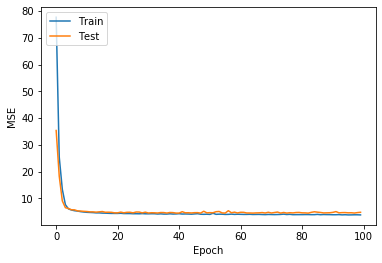

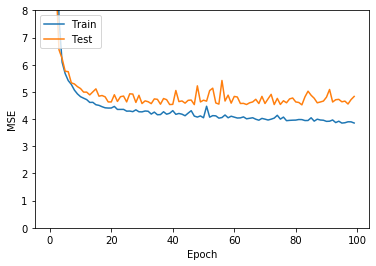

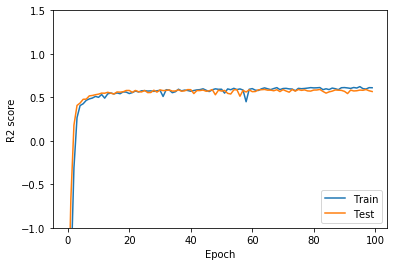

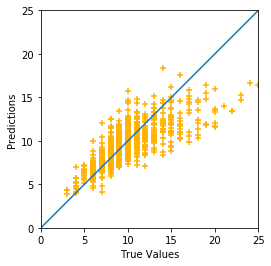

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 6

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [58]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_27 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 129       
Total params: 11,281
Trainable params: 11,281
Non-trainable params: 0
_________________________________________________________________


In [60]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 431us/sample - loss: 80.9815 - mae: 8.2865 - coeff: -7.2948 - val_loss: 42.5852 - val_mae: 5.5264 - val_coeff: -2.9638
Epoch 2/100
3341/3341 [==============================] - 0s 125us/sample - loss: 24.6303 - mae: 3.8124 - coeff: -1.4809 - val_loss: 14.7183 - val_mae: 2.8192 - val_coeff: -0.3362
Epoch 3/100
3341/3341 [==============================] - 0s 95us/sample - loss: 13.5171 - mae: 2.3555 - coeff: -0.3840 - val_loss: 9.7417 - val_mae: 2.1292 - val_coeff: 0.1144
Epoch 4/100
3341/3341 [==============================] - 0s 91us/sample - loss: 10.0604 - mae: 2.0196 - coeff: -0.0193 - val_loss: 7.8099 - val_mae: 1.9880 - val_coeff: 0.2957
Epoch 5/100
3341/3341 [==============================] - 0s 110us/sample - loss: 8.2138 - mae: 1.8998 - coeff: -1.8148 - val_loss: 7.4759 - val_mae: 1.8771 - val_coeff: 0.3255
Epoch 6/100
3341/3341 [==============================] - 0s 68us/sa

3341/3341 [==============================] - 0s 65us/sample - loss: 4.1534 - mae: 1.4426 - coeff: 0.5895 - val_loss: 4.5764 - val_mae: 1.4940 - val_coeff: 0.5876
Epoch 48/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.1618 - mae: 1.4492 - coeff: 0.5858 - val_loss: 4.6726 - val_mae: 1.4918 - val_coeff: 0.5804
Epoch 49/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.1795 - mae: 1.4591 - coeff: 0.5977 - val_loss: 4.9131 - val_mae: 1.5257 - val_coeff: 0.5587
Epoch 50/100
3341/3341 [==============================] - 0s 71us/sample - loss: 4.2383 - mae: 1.4670 - coeff: 0.5775 - val_loss: 4.6193 - val_mae: 1.5454 - val_coeff: 0.5825
Epoch 51/100
3341/3341 [==============================] - 0s 63us/sample - loss: 4.2711 - mae: 1.4740 - coeff: 0.5717 - val_loss: 4.7063 - val_mae: 1.4959 - val_coeff: 0.5771
Epoch 52/100
3341/3341 [==============================] - 0s 58us/sample - loss: 4.1454 - mae: 1.4466 - coeff: 0.5876 - val_loss: 4.5614 -

Epoch 94/100
3341/3341 [==============================] - 0s 89us/sample - loss: 3.9547 - mae: 1.4159 - coeff: 0.6097 - val_loss: 4.7025 - val_mae: 1.4998 - val_coeff: 0.5783
Epoch 95/100
3341/3341 [==============================] - 0s 83us/sample - loss: 3.9834 - mae: 1.4204 - coeff: 0.5939 - val_loss: 4.9352 - val_mae: 1.5226 - val_coeff: 0.5576
Epoch 96/100
3341/3341 [==============================] - 0s 60us/sample - loss: 3.9620 - mae: 1.4182 - coeff: 0.5700 - val_loss: 4.7986 - val_mae: 1.5094 - val_coeff: 0.5690
Epoch 97/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.2292 - mae: 1.4693 - coeff: 0.5657 - val_loss: 4.6382 - val_mae: 1.4920 - val_coeff: 0.5831
Epoch 98/100
3341/3341 [==============================] - 0s 68us/sample - loss: 4.0645 - mae: 1.4345 - coeff: 0.5985 - val_loss: 4.5175 - val_mae: 1.5150 - val_coeff: 0.5905
Epoch 99/100
3341/3341 [==============================] - 0s 57us/sample - loss: 3.9274 - mae: 1.4046 - coeff: 0.6143 - val_l

In [61]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [62]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.552099055577157
RMSE :      2.1335648702528727
r2_score :  0.5943469697704226


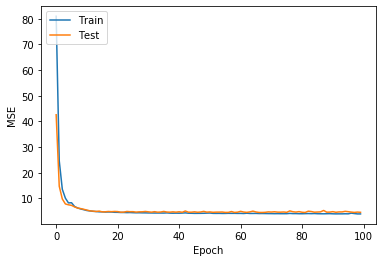

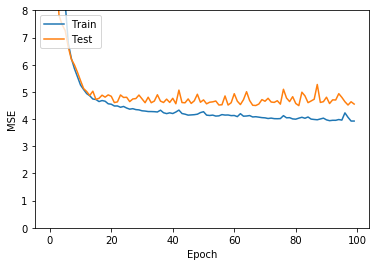

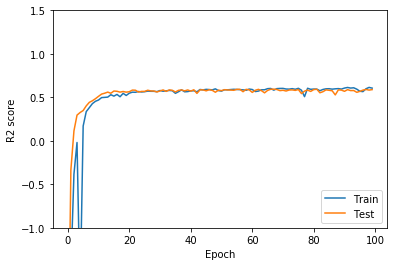

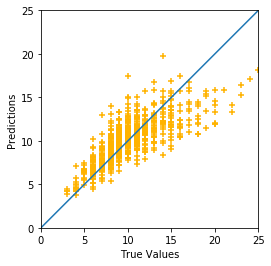

In [63]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 7

In [64]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [65]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [66]:
def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_32 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [68]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 347us/sample - loss: 81.2038 - mae: 8.2479 - coeff: -7.0970 - val_loss: 51.9695 - val_mae: 6.2325 - val_coeff: -3.8252
Epoch 2/100
3341/3341 [==============================] - 0s 74us/sample - loss: 33.8315 - mae: 4.7033 - coeff: -2.3921 - val_loss: 24.5162 - val_mae: 3.8838 - val_coeff: -1.2148
Epoch 3/100
3341/3341 [==============================] - 0s 67us/sample - loss: 20.4025 - mae: 3.3680 - coeff: -1.9548 - val_loss: 15.2139 - val_mae: 2.8584 - val_coeff: -0.3707
Epoch 4/100
3341/3341 [==============================] - 0s 56us/sample - loss: 13.0457 - mae: 2.5195 - coeff: -0.2905 - val_loss: 10.5561 - val_mae: 2.2737 - val_coeff: 0.0580
Epoch 5/100
3341/3341 [==============================] - 0s 55us/sample - loss: 9.0455 - mae: 2.0626 - coeff: 0.0934 - val_loss: 8.0466 - val_mae: 1.9497 - val_coeff: 0.2828
Epoch 6/100
3341/3341 [==============================] - 0s 57us/sa

3341/3341 [==============================] - 0s 47us/sample - loss: 4.1388 - mae: 1.4394 - coeff: 0.5897 - val_loss: 4.5121 - val_mae: 1.4862 - val_coeff: 0.5936
Epoch 48/100
3341/3341 [==============================] - 0s 45us/sample - loss: 4.1351 - mae: 1.4488 - coeff: 0.5835 - val_loss: 4.6377 - val_mae: 1.5322 - val_coeff: 0.5819
Epoch 49/100
3341/3341 [==============================] - 0s 52us/sample - loss: 4.1734 - mae: 1.4588 - coeff: 0.5827 - val_loss: 4.9047 - val_mae: 1.5030 - val_coeff: 0.5591
Epoch 50/100
3341/3341 [==============================] - 0s 45us/sample - loss: 4.1684 - mae: 1.4498 - coeff: 0.5926 - val_loss: 4.8884 - val_mae: 1.5021 - val_coeff: 0.5606
Epoch 51/100
3341/3341 [==============================] - 0s 52us/sample - loss: 4.1557 - mae: 1.4392 - coeff: 0.5793 - val_loss: 4.5180 - val_mae: 1.5086 - val_coeff: 0.5925
Epoch 52/100
3341/3341 [==============================] - 0s 88us/sample - loss: 4.2178 - mae: 1.4774 - coeff: 0.5688 - val_loss: 4.4712 -

Epoch 94/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.0012 - mae: 1.4227 - coeff: 0.6054 - val_loss: 4.4550 - val_mae: 1.4927 - val_coeff: 0.5975
Epoch 95/100
3341/3341 [==============================] - 0s 44us/sample - loss: 4.0292 - mae: 1.4294 - coeff: 0.6051 - val_loss: 4.6586 - val_mae: 1.4852 - val_coeff: 0.5806
Epoch 96/100
3341/3341 [==============================] - 0s 43us/sample - loss: 3.9920 - mae: 1.4113 - coeff: 0.6098 - val_loss: 4.5668 - val_mae: 1.4814 - val_coeff: 0.5887
Epoch 97/100
3341/3341 [==============================] - 0s 48us/sample - loss: 3.9690 - mae: 1.4138 - coeff: 0.6045 - val_loss: 4.5196 - val_mae: 1.4867 - val_coeff: 0.5925
Epoch 98/100
3341/3341 [==============================] - 0s 45us/sample - loss: 3.9776 - mae: 1.4198 - coeff: 0.5949 - val_loss: 4.8040 - val_mae: 1.4928 - val_coeff: 0.5680
Epoch 99/100
3341/3341 [==============================] - 0s 90us/sample - loss: 4.0697 - mae: 1.4277 - coeff: 0.5953 - val_l

In [69]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [70]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.525760280149429
RMSE :      2.1273834351497216
r2_score :  0.5966941076367887


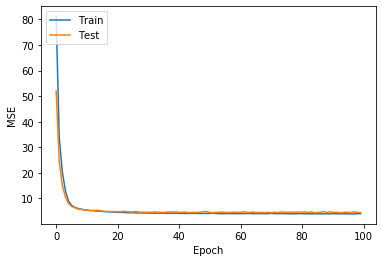

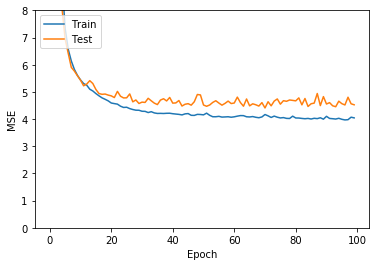

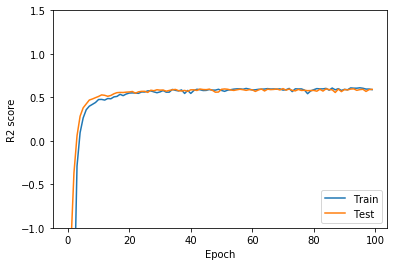

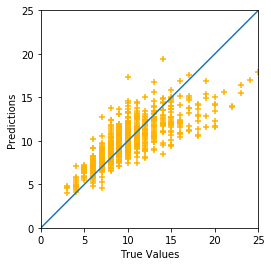

In [71]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 8

In [72]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [73]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [74]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 257       
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________


In [76]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 269us/sample - loss: 60.4704 - mae: 6.7256 - coeff: -4.8638 - val_loss: 27.0477 - val_mae: 4.0273 - val_coeff: -1.4273
Epoch 2/100
3341/3341 [==============================] - 0s 59us/sample - loss: 17.0233 - mae: 2.9693 - coeff: -0.7018 - val_loss: 8.0166 - val_mae: 1.9683 - val_coeff: 0.2793
Epoch 3/100
3341/3341 [==============================] - 0s 75us/sample - loss: 6.9815 - mae: 1.7750 - coeff: 0.3201 - val_loss: 6.3219 - val_mae: 1.7684 - val_coeff: 0.4283
Epoch 4/100
3341/3341 [==============================] - 0s 64us/sample - loss: 5.7098 - mae: 1.6470 - coeff: 0.4391 - val_loss: 5.5542 - val_mae: 1.6380 - val_coeff: 0.5005
Epoch 5/100
3341/3341 [==============================] - 0s 53us/sample - loss: 5.2996 - mae: 1.6065 - coeff: 0.4580 - val_loss: 4.9808 - val_mae: 1.6134 - val_coeff: 0.5517
Epoch 6/100
3341/3341 [==============================] - 0s 59us/sample - lo

3341/3341 [==============================] - 0s 58us/sample - loss: 4.0436 - mae: 1.4179 - coeff: 0.6010 - val_loss: 4.5841 - val_mae: 1.4872 - val_coeff: 0.5862
Epoch 48/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1495 - mae: 1.4403 - coeff: 0.5676 - val_loss: 4.5987 - val_mae: 1.5651 - val_coeff: 0.5822
Epoch 49/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.0425 - mae: 1.4216 - coeff: 0.6047 - val_loss: 4.5611 - val_mae: 1.5014 - val_coeff: 0.5878
Epoch 50/100
3341/3341 [==============================] - 0s 47us/sample - loss: 4.0191 - mae: 1.4245 - coeff: 0.5981 - val_loss: 4.6159 - val_mae: 1.4898 - val_coeff: 0.5835
Epoch 51/100
3341/3341 [==============================] - 0s 44us/sample - loss: 4.0647 - mae: 1.4327 - coeff: 0.5951 - val_loss: 4.6512 - val_mae: 1.5186 - val_coeff: 0.5805
Epoch 52/100
3341/3341 [==============================] - 0s 46us/sample - loss: 4.0331 - mae: 1.4198 - coeff: 0.5948 - val_loss: 4.5958 -

Epoch 94/100
3341/3341 [==============================] - 0s 56us/sample - loss: 3.8421 - mae: 1.3986 - coeff: 0.6202 - val_loss: 4.5948 - val_mae: 1.4971 - val_coeff: 0.5855
Epoch 95/100
3341/3341 [==============================] - 0s 64us/sample - loss: 3.8125 - mae: 1.3980 - coeff: 0.6014 - val_loss: 4.8626 - val_mae: 1.5079 - val_coeff: 0.5646
Epoch 96/100
3341/3341 [==============================] - 0s 58us/sample - loss: 3.8021 - mae: 1.3989 - coeff: 0.6086 - val_loss: 4.6098 - val_mae: 1.5086 - val_coeff: 0.5859
Epoch 97/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.7898 - mae: 1.4048 - coeff: 0.5926 - val_loss: 4.9370 - val_mae: 1.5092 - val_coeff: 0.5582
Epoch 98/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.7506 - mae: 1.3893 - coeff: 0.6318 - val_loss: 4.6219 - val_mae: 1.5080 - val_coeff: 0.5842
Epoch 99/100
3341/3341 [==============================] - 0s 58us/sample - loss: 3.7646 - mae: 1.3844 - coeff: 0.6184 - val_l

In [77]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [78]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.799330025373402
RMSE :      2.1907373245949415
r2_score :  0.5723153771271188


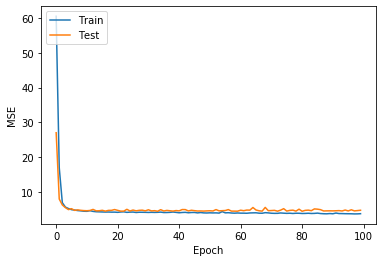

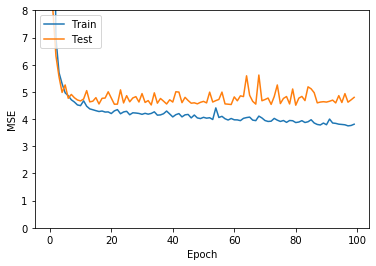

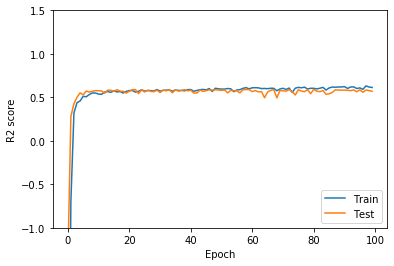

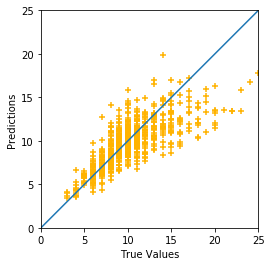

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 9

In [80]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [82]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [83]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_40 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_41 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 513       
Total params: 174,145
Trainable params: 174,145
Non-trainable params: 0
_________________________________________________________________


In [84]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 269us/sample - loss: 47.1577 - mae: 5.4702 - coeff: -3.6372 - val_loss: 13.2307 - val_mae: 2.5996 - val_coeff: -0.1963
Epoch 2/100
3341/3341 [==============================] - 0s 65us/sample - loss: 11.2083 - mae: 2.0820 - coeff: -0.1537 - val_loss: 7.2573 - val_mae: 1.8356 - val_coeff: 0.3484
Epoch 3/100
3341/3341 [==============================] - 0s 68us/sample - loss: 7.6201 - mae: 1.9211 - coeff: 0.2282 - val_loss: 6.4728 - val_mae: 1.7389 - val_coeff: 0.4210
Epoch 4/100
3341/3341 [==============================] - 0s 81us/sample - loss: 6.0096 - mae: 1.6571 - coeff: 0.3965 - val_loss: 5.4477 - val_mae: 1.6569 - val_coeff: 0.5112
Epoch 5/100
3341/3341 [==============================] - 0s 97us/sample - loss: 5.4852 - mae: 1.6241 - coeff: 0.4439 - val_loss: 5.1346 - val_mae: 1.6009 - val_coeff: 0.5400
Epoch 6/100
3341/3341 [==============================] - 0s 122us/sample - l

3341/3341 [==============================] - 0s 52us/sample - loss: 3.7455 - mae: 1.3966 - coeff: 0.6214 - val_loss: 4.6121 - val_mae: 1.5053 - val_coeff: 0.5836
Epoch 48/100
3341/3341 [==============================] - 0s 50us/sample - loss: 3.7335 - mae: 1.3901 - coeff: 0.6190 - val_loss: 4.7265 - val_mae: 1.4996 - val_coeff: 0.5757
Epoch 49/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.8002 - mae: 1.4053 - coeff: 0.6261 - val_loss: 5.3059 - val_mae: 1.5709 - val_coeff: 0.5250
Epoch 50/100
3341/3341 [==============================] - 0s 66us/sample - loss: 3.7424 - mae: 1.3943 - coeff: 0.6178 - val_loss: 4.6105 - val_mae: 1.5105 - val_coeff: 0.5848
Epoch 51/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.6898 - mae: 1.3809 - coeff: 0.6192 - val_loss: 4.7043 - val_mae: 1.4952 - val_coeff: 0.5769
Epoch 52/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.7161 - mae: 1.3824 - coeff: 0.6171 - val_loss: 4.8381 -

Epoch 94/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.1317 - mae: 1.2962 - coeff: 0.6730 - val_loss: 4.7828 - val_mae: 1.5189 - val_coeff: 0.5641
Epoch 95/100
3341/3341 [==============================] - 0s 60us/sample - loss: 2.9794 - mae: 1.2572 - coeff: 0.7070 - val_loss: 4.8641 - val_mae: 1.5266 - val_coeff: 0.5592
Epoch 96/100
3341/3341 [==============================] - 0s 53us/sample - loss: 2.9255 - mae: 1.2523 - coeff: 0.7099 - val_loss: 4.9000 - val_mae: 1.5431 - val_coeff: 0.5524
Epoch 97/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.0528 - mae: 1.2765 - coeff: 0.6768 - val_loss: 5.1390 - val_mae: 1.6576 - val_coeff: 0.5283
Epoch 98/100
3341/3341 [==============================] - 0s 53us/sample - loss: 3.0847 - mae: 1.2818 - coeff: 0.6943 - val_loss: 4.9974 - val_mae: 1.5322 - val_coeff: 0.5496
Epoch 99/100
3341/3341 [==============================] - 0s 50us/sample - loss: 3.0185 - mae: 1.2672 - coeff: 0.6903 - val_l

In [85]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [86]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.04023041787602
RMSE :      2.245045749617593
r2_score :  0.5508479237591051


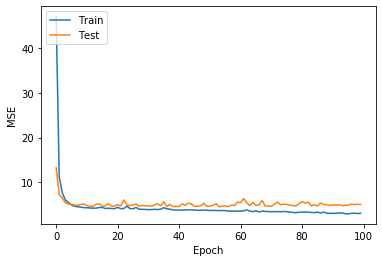

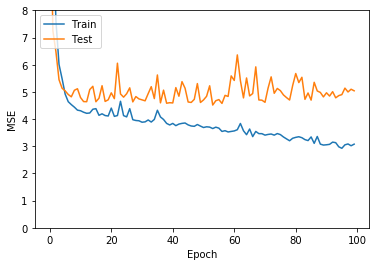

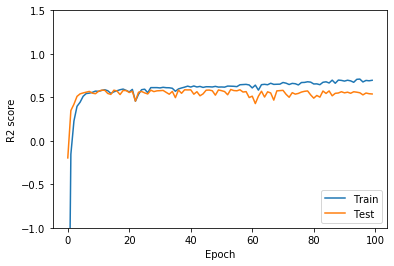

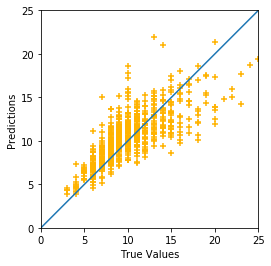

In [87]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 10

In [88]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [89]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [90]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [91]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_44 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_45 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_46 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 257       
Total params: 44,433
Trainable params: 44,433
Non-trainable params: 0
_________________________________________________

In [92]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 270us/sample - loss: 74.7502 - mae: 7.7675 - coeff: -6.3617 - val_loss: 30.5337 - val_mae: 4.0809 - val_coeff: -1.7885
Epoch 2/100
3341/3341 [==============================] - 0s 58us/sample - loss: 19.5816 - mae: 3.1636 - coeff: -0.9427 - val_loss: 9.7452 - val_mae: 2.2731 - val_coeff: 0.1308
Epoch 3/100
3341/3341 [==============================] - 0s 134us/sample - loss: 8.7862 - mae: 1.9946 - coeff: 0.1620 - val_loss: 6.3851 - val_mae: 1.8234 - val_coeff: 0.4299
Epoch 4/100
3341/3341 [==============================] - 1s 164us/sample - loss: 6.3484 - mae: 1.7054 - coeff: 0.3354 - val_loss: 6.5384 - val_mae: 1.7274 - val_coeff: 0.4125
Epoch 5/100
3341/3341 [==============================] - 0s 87us/sample - loss: 5.7293 - mae: 1.6524 - coeff: 0.4366 - val_loss: 5.4077 - val_mae: 1.6717 - val_coeff: 0.5106
Epoch 6/100
3341/3341 [==============================] - 0s 120us/sample -

3341/3341 [==============================] - 0s 50us/sample - loss: 4.1634 - mae: 1.4580 - coeff: 0.5797 - val_loss: 4.9046 - val_mae: 1.5150 - val_coeff: 0.5599
Epoch 48/100
3341/3341 [==============================] - 0s 48us/sample - loss: 4.1967 - mae: 1.4597 - coeff: 0.5816 - val_loss: 4.8898 - val_mae: 1.5129 - val_coeff: 0.5618
Epoch 49/100
3341/3341 [==============================] - 0s 47us/sample - loss: 4.0500 - mae: 1.4308 - coeff: 0.5968 - val_loss: 4.6628 - val_mae: 1.5661 - val_coeff: 0.5768
Epoch 50/100
3341/3341 [==============================] - 0s 52us/sample - loss: 4.2765 - mae: 1.4947 - coeff: 0.5742 - val_loss: 4.5746 - val_mae: 1.5159 - val_coeff: 0.5879
Epoch 51/100
3341/3341 [==============================] - 0s 49us/sample - loss: 4.0862 - mae: 1.4525 - coeff: 0.6025 - val_loss: 4.8796 - val_mae: 1.4988 - val_coeff: 0.5628
Epoch 52/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.1746 - mae: 1.4450 - coeff: 0.5912 - val_loss: 4.6365 -

Epoch 94/100
3341/3341 [==============================] - 0s 96us/sample - loss: 3.7644 - mae: 1.3836 - coeff: 0.6267 - val_loss: 4.8962 - val_mae: 1.4990 - val_coeff: 0.5623
Epoch 95/100
3341/3341 [==============================] - 0s 63us/sample - loss: 3.7606 - mae: 1.3854 - coeff: 0.6103 - val_loss: 4.8117 - val_mae: 1.5000 - val_coeff: 0.5690
Epoch 96/100
3341/3341 [==============================] - 0s 82us/sample - loss: 3.8159 - mae: 1.3911 - coeff: 0.6177 - val_loss: 4.6737 - val_mae: 1.4909 - val_coeff: 0.5802
Epoch 97/100
3341/3341 [==============================] - 0s 96us/sample - loss: 3.7461 - mae: 1.3830 - coeff: 0.6311 - val_loss: 4.7590 - val_mae: 1.5187 - val_coeff: 0.5736
Epoch 98/100
3341/3341 [==============================] - 0s 106us/sample - loss: 3.7960 - mae: 1.3906 - coeff: 0.6305 - val_loss: 4.8784 - val_mae: 1.5067 - val_coeff: 0.5636
Epoch 99/100
3341/3341 [==============================] - 0s 93us/sample - loss: 3.7426 - mae: 1.3828 - coeff: 0.6197 - val_

In [93]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [94]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.8069086891016095
RMSE :      2.1924663484536335
r2_score :  0.5716400166244355


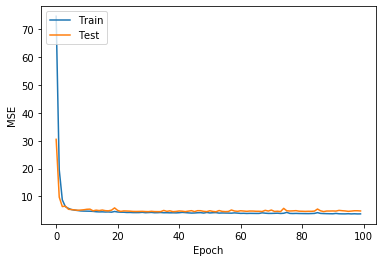

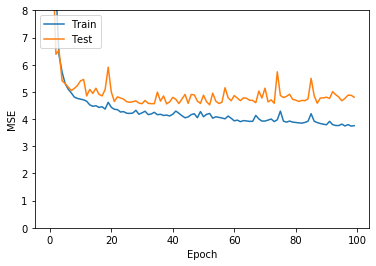

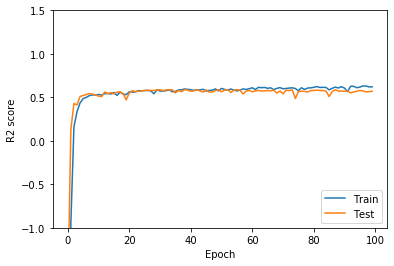

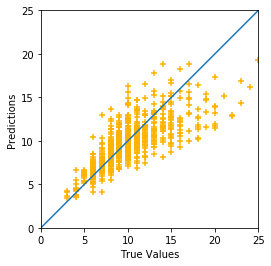

In [95]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 11

In [96]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [97]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [98]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [99]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_50 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_51 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 257       
Total params: 85,153
Trainable params: 85,153
Non-trainable params: 0
_________________________________________________________________


In [100]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 315us/sample - loss: 50.5988 - mae: 5.7735 - coeff: -3.9072 - val_loss: 19.5459 - val_mae: 3.4548 - val_coeff: -0.7893
Epoch 2/100
3341/3341 [==============================] - 0s 64us/sample - loss: 11.9973 - mae: 2.3399 - coeff: -0.2179 - val_loss: 7.0741 - val_mae: 1.8786 - val_coeff: 0.3624
Epoch 3/100
3341/3341 [==============================] - 0s 62us/sample - loss: 6.8293 - mae: 1.8202 - coeff: 0.3111 - val_loss: 6.4475 - val_mae: 1.7723 - val_coeff: 0.4199
Epoch 4/100
3341/3341 [==============================] - 0s 92us/sample - loss: 6.0043 - mae: 1.6933 - coeff: 0.3983 - val_loss: 6.2028 - val_mae: 1.7270 - val_coeff: 0.4414
Epoch 5/100
3341/3341 [==============================] - 0s 91us/sample - loss: 5.5726 - mae: 1.6410 - coeff: 0.4620 - val_loss: 5.3872 - val_mae: 1.6849 - val_coeff: 0.5127
Epoch 6/100
3341/3341 [==============================] - 0s 79us/sample - lo

3341/3341 [==============================] - 0s 53us/sample - loss: 4.0042 - mae: 1.4242 - coeff: 0.6104 - val_loss: 4.7441 - val_mae: 1.4993 - val_coeff: 0.5737
Epoch 48/100
3341/3341 [==============================] - 0s 54us/sample - loss: 3.9357 - mae: 1.4278 - coeff: 0.5957 - val_loss: 5.0526 - val_mae: 1.5530 - val_coeff: 0.5444
Epoch 49/100
3341/3341 [==============================] - 0s 51us/sample - loss: 3.9086 - mae: 1.4186 - coeff: 0.6071 - val_loss: 4.6431 - val_mae: 1.5003 - val_coeff: 0.5811
Epoch 50/100
3341/3341 [==============================] - 0s 52us/sample - loss: 3.9927 - mae: 1.4415 - coeff: 0.6005 - val_loss: 4.6514 - val_mae: 1.5189 - val_coeff: 0.5785
Epoch 51/100
3341/3341 [==============================] - 0s 51us/sample - loss: 3.9275 - mae: 1.4176 - coeff: 0.6123 - val_loss: 4.8331 - val_mae: 1.5191 - val_coeff: 0.5648
Epoch 52/100
3341/3341 [==============================] - 0s 54us/sample - loss: 3.8952 - mae: 1.4106 - coeff: 0.5971 - val_loss: 4.5721 -

Epoch 94/100
3341/3341 [==============================] - 0s 50us/sample - loss: 3.5259 - mae: 1.3488 - coeff: 0.6498 - val_loss: 4.7689 - val_mae: 1.5240 - val_coeff: 0.5721
Epoch 95/100
3341/3341 [==============================] - 0s 49us/sample - loss: 3.5579 - mae: 1.3701 - coeff: 0.6398 - val_loss: 4.9988 - val_mae: 1.5373 - val_coeff: 0.5508
Epoch 96/100
3341/3341 [==============================] - 0s 49us/sample - loss: 3.4932 - mae: 1.3447 - coeff: 0.6489 - val_loss: 5.0506 - val_mae: 1.5225 - val_coeff: 0.5478
Epoch 97/100
3341/3341 [==============================] - 0s 52us/sample - loss: 3.4959 - mae: 1.3419 - coeff: 0.6470 - val_loss: 4.7543 - val_mae: 1.5153 - val_coeff: 0.5729
Epoch 98/100
3341/3341 [==============================] - 0s 49us/sample - loss: 3.5085 - mae: 1.3518 - coeff: 0.6535 - val_loss: 4.9932 - val_mae: 1.5376 - val_coeff: 0.5517
Epoch 99/100
3341/3341 [==============================] - 0s 55us/sample - loss: 3.5390 - mae: 1.3535 - coeff: 0.6404 - val_l

In [101]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [102]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.76759906731225
RMSE :      2.1834832418207952
r2_score :  0.5751430307287739


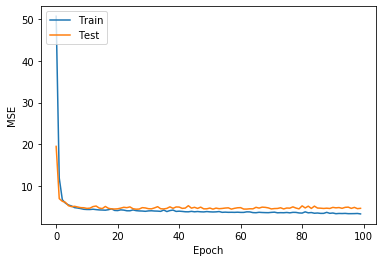

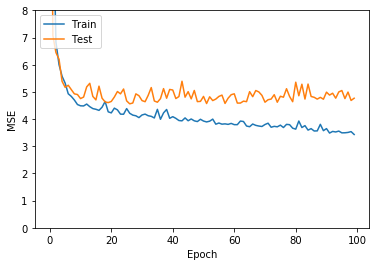

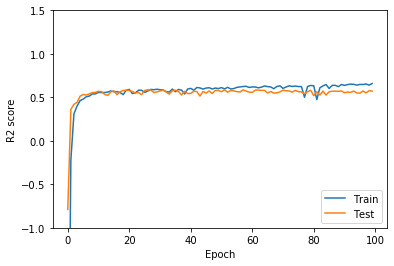

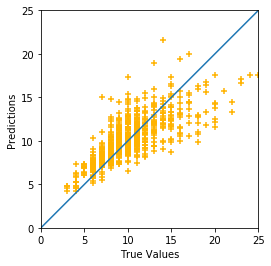

In [103]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 12

In [104]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [105]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [106]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [107]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_55 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_56 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [108]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 2s 598us/sample - loss: 94.6409 - mae: 9.1794 - coeff: -8.7452 - val_loss: 80.0785 - val_mae: 8.2405 - val_coeff: -6.4542
Epoch 2/100
3341/3341 [==============================] - 0s 92us/sample - loss: 53.3145 - mae: 6.3494 - coeff: -4.1929 - val_loss: 32.4632 - val_mae: 4.6657 - val_coeff: -1.9948
Epoch 3/100
3341/3341 [==============================] - 0s 99us/sample - loss: 26.1799 - mae: 4.0175 - coeff: -1.7052 - val_loss: 21.0861 - val_mae: 3.5612 - val_coeff: -0.9180
Epoch 4/100
3341/3341 [==============================] - 0s 85us/sample - loss: 17.0683 - mae: 3.0397 - coeff: -0.6866 - val_loss: 12.3635 - val_mae: 2.5403 - val_coeff: -0.1225
Epoch 5/100
3341/3341 [==============================] - 0s 74us/sample - loss: 10.2983 - mae: 2.1672 - coeff: 0.0012 - val_loss: 8.1704 - val_mae: 1.9678 - val_coeff: 0.2568
Epoch 6/100
3341/3341 [==============================] - 0s 80us/

3341/3341 [==============================] - 0s 54us/sample - loss: 4.2695 - mae: 1.4753 - coeff: 0.5754 - val_loss: 4.8394 - val_mae: 1.5167 - val_coeff: 0.5655
Epoch 48/100
3341/3341 [==============================] - 0s 57us/sample - loss: 4.3126 - mae: 1.4869 - coeff: 0.5532 - val_loss: 4.6073 - val_mae: 1.5083 - val_coeff: 0.5851
Epoch 49/100
3341/3341 [==============================] - 0s 60us/sample - loss: 4.2912 - mae: 1.4684 - coeff: 0.5742 - val_loss: 4.6374 - val_mae: 1.4953 - val_coeff: 0.5827
Epoch 50/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.2416 - mae: 1.4692 - coeff: 0.5846 - val_loss: 4.7513 - val_mae: 1.4974 - val_coeff: 0.5730
Epoch 51/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.2554 - mae: 1.4667 - coeff: 0.5827 - val_loss: 4.7218 - val_mae: 1.5038 - val_coeff: 0.5757
Epoch 52/100
3341/3341 [==============================] - 0s 58us/sample - loss: 4.2755 - mae: 1.4707 - coeff: 0.5749 - val_loss: 4.5608 -

Epoch 94/100
3341/3341 [==============================] - 0s 45us/sample - loss: 4.1935 - mae: 1.4682 - coeff: 0.5822 - val_loss: 4.6344 - val_mae: 1.4997 - val_coeff: 0.5818
Epoch 95/100
3341/3341 [==============================] - 0s 73us/sample - loss: 4.1138 - mae: 1.4421 - coeff: 0.5920 - val_loss: 4.7444 - val_mae: 1.5021 - val_coeff: 0.5724
Epoch 96/100
3341/3341 [==============================] - 0s 68us/sample - loss: 4.1232 - mae: 1.4449 - coeff: 0.5932 - val_loss: 4.6415 - val_mae: 1.5017 - val_coeff: 0.5810
Epoch 97/100
3341/3341 [==============================] - 0s 45us/sample - loss: 4.1080 - mae: 1.4436 - coeff: 0.5892 - val_loss: 4.6579 - val_mae: 1.4998 - val_coeff: 0.5796
Epoch 98/100
3341/3341 [==============================] - 0s 50us/sample - loss: 4.0949 - mae: 1.4383 - coeff: 0.5714 - val_loss: 5.1123 - val_mae: 1.5406 - val_coeff: 0.5399
Epoch 99/100
3341/3341 [==============================] - 0s 45us/sample - loss: 4.1864 - mae: 1.4520 - coeff: 0.5878 - val_l

In [109]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [110]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.565481844775284
RMSE :      2.1366988193882834
r2_score :  0.5931543839051188


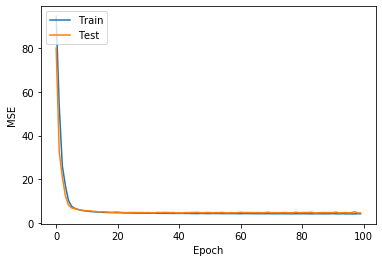

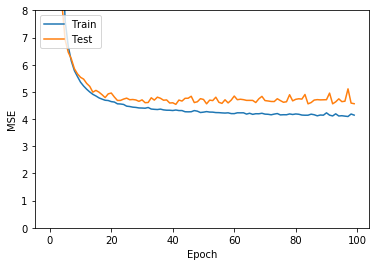

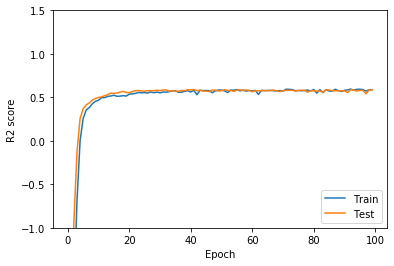

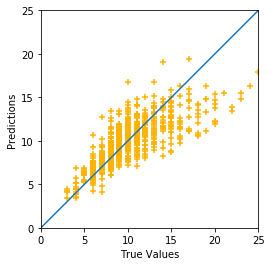

In [111]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 13

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [113]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [114]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [115]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_59 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_60 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 33        
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


In [116]:
epochs = 100
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 371us/sample - loss: 108.8419 - mae: 9.9428 - coeff: -10.1197 - val_loss: 108.8189 - val_mae: 9.8773 - val_coeff: -9.1180
Epoch 2/100
3341/3341 [==============================] - 0s 91us/sample - loss: 99.6109 - mae: 9.4317 - coeff: -8.9197 - val_loss: 97.2483 - val_mae: 9.2147 - val_coeff: -8.0390
Epoch 3/100
3341/3341 [==============================] - 0s 92us/sample - loss: 83.5292 - mae: 8.4424 - coeff: -7.4307 - val_loss: 72.8070 - val_mae: 7.6778 - val_coeff: -5.7601
Epoch 4/100
3341/3341 [==============================] - 0s 65us/sample - loss: 52.5483 - mae: 6.3273 - coeff: -4.3462 - val_loss: 34.3772 - val_mae: 4.8982 - val_coeff: -2.1713
Epoch 5/100
3341/3341 [==============================] - 0s 90us/sample - loss: 22.8728 - mae: 3.7300 - coeff: -1.2817 - val_loss: 17.0187 - val_mae: 3.1398 - val_coeff: -0.5245
Epoch 6/100
3341/3341 [==============================] - 0s

3341/3341 [==============================] - 0s 60us/sample - loss: 4.6530 - mae: 1.5364 - coeff: 0.5407 - val_loss: 4.8627 - val_mae: 1.5513 - val_coeff: 0.5625
Epoch 48/100
3341/3341 [==============================] - 0s 90us/sample - loss: 4.6309 - mae: 1.5429 - coeff: 0.5449 - val_loss: 4.9211 - val_mae: 1.5469 - val_coeff: 0.5575
Epoch 49/100
3341/3341 [==============================] - 0s 91us/sample - loss: 4.6193 - mae: 1.5327 - coeff: 0.5452 - val_loss: 4.7952 - val_mae: 1.5437 - val_coeff: 0.5683
Epoch 50/100
3341/3341 [==============================] - 0s 73us/sample - loss: 4.6032 - mae: 1.5358 - coeff: 0.5466 - val_loss: 4.8135 - val_mae: 1.5403 - val_coeff: 0.5668
Epoch 51/100
3341/3341 [==============================] - 0s 67us/sample - loss: 4.5965 - mae: 1.5406 - coeff: 0.5459 - val_loss: 4.9055 - val_mae: 1.5406 - val_coeff: 0.5589
Epoch 52/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.5782 - mae: 1.5305 - coeff: 0.5456 - val_loss: 4.8589 -

Epoch 94/100
3341/3341 [==============================] - 0s 97us/sample - loss: 4.1997 - mae: 1.4601 - coeff: 0.5702 - val_loss: 4.6687 - val_mae: 1.4925 - val_coeff: 0.5798
Epoch 95/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.1777 - mae: 1.4623 - coeff: 0.5857 - val_loss: 4.6460 - val_mae: 1.4913 - val_coeff: 0.5815
Epoch 96/100
3341/3341 [==============================] - 0s 51us/sample - loss: 4.1862 - mae: 1.4599 - coeff: 0.5869 - val_loss: 4.6064 - val_mae: 1.4928 - val_coeff: 0.5852
Epoch 97/100
3341/3341 [==============================] - 0s 45us/sample - loss: 4.1961 - mae: 1.4646 - coeff: 0.5767 - val_loss: 4.6347 - val_mae: 1.4902 - val_coeff: 0.5825
Epoch 98/100
3341/3341 [==============================] - 0s 44us/sample - loss: 4.1675 - mae: 1.4555 - coeff: 0.5872 - val_loss: 4.8092 - val_mae: 1.5044 - val_coeff: 0.5677
Epoch 99/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1802 - mae: 1.4531 - coeff: 0.5812 - val_l

In [117]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [118]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.649986601028397
RMSE :      2.1563827584703965
r2_score :  0.5856238776432026


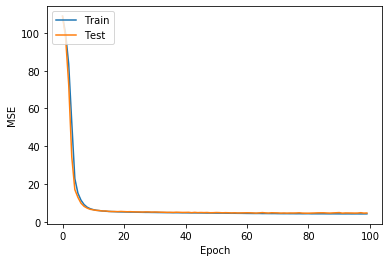

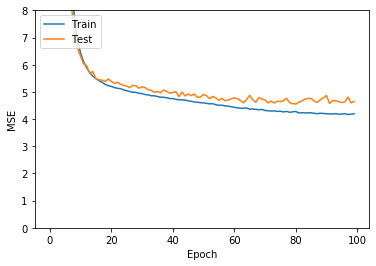

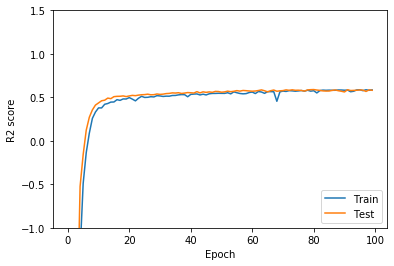

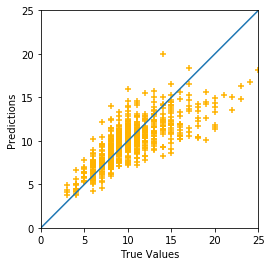

In [119]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 14 - 16 32 64 - 200

In [120]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [121]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [122]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [123]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_63 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [124]:
epochs = 200
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/200
3341/3341 [==============================] - 1s 363us/sample - loss: 100.8051 - mae: 9.5046 - coeff: -9.4541 - val_loss: 91.0122 - val_mae: 8.8972 - val_coeff: -7.4704
Epoch 2/200
3341/3341 [==============================] - 0s 54us/sample - loss: 66.8328 - mae: 7.3295 - coeff: -5.6574 - val_loss: 41.2368 - val_mae: 5.3390 - val_coeff: -2.8315
Epoch 3/200
3341/3341 [==============================] - 0s 54us/sample - loss: 27.0806 - mae: 4.1310 - coeff: -1.7203 - val_loss: 21.1364 - val_mae: 3.4835 - val_coeff: -0.9160
Epoch 4/200
3341/3341 [==============================] - 0s 53us/sample - loss: 17.7304 - mae: 3.0806 - coeff: -0.7772 - val_loss: 13.8306 - val_mae: 2.6564 - val_coeff: -0.2561
Epoch 5/200
3341/3341 [==============================] - 0s 67us/sample - loss: 11.6441 - mae: 2.3519 - coeff: -0.1426 - val_loss: 9.5944 - val_mae: 2.1370 - val_coeff: 0.1322
Epoch 6/200
3341/3341 [==============================] - 0s 73u

3341/3341 [==============================] - 0s 54us/sample - loss: 4.1581 - mae: 1.4471 - coeff: 0.5790 - val_loss: 4.6079 - val_mae: 1.4983 - val_coeff: 0.5853
Epoch 48/200
3341/3341 [==============================] - 0s 50us/sample - loss: 4.1618 - mae: 1.4496 - coeff: 0.5854 - val_loss: 4.6968 - val_mae: 1.4985 - val_coeff: 0.5777
Epoch 49/200
3341/3341 [==============================] - 0s 47us/sample - loss: 4.1415 - mae: 1.4414 - coeff: 0.5754 - val_loss: 4.6526 - val_mae: 1.5052 - val_coeff: 0.5817
Epoch 50/200
3341/3341 [==============================] - 0s 55us/sample - loss: 4.1602 - mae: 1.4554 - coeff: 0.5873 - val_loss: 4.7410 - val_mae: 1.5052 - val_coeff: 0.5742
Epoch 51/200
3341/3341 [==============================] - 0s 49us/sample - loss: 4.1406 - mae: 1.4421 - coeff: 0.5932 - val_loss: 4.8658 - val_mae: 1.5228 - val_coeff: 0.5633
Epoch 52/200
3341/3341 [==============================] - 0s 57us/sample - loss: 4.1154 - mae: 1.4350 - coeff: 0.5911 - val_loss: 4.5426 -

3341/3341 [==============================] - 0s 48us/sample - loss: 4.0492 - mae: 1.4294 - coeff: 0.5795 - val_loss: 4.7428 - val_mae: 1.5005 - val_coeff: 0.5751
Epoch 94/200
3341/3341 [==============================] - 0s 41us/sample - loss: 4.0571 - mae: 1.4238 - coeff: 0.5994 - val_loss: 4.6773 - val_mae: 1.5044 - val_coeff: 0.5805
Epoch 95/200
3341/3341 [==============================] - 0s 46us/sample - loss: 4.0328 - mae: 1.4340 - coeff: 0.5966 - val_loss: 4.6933 - val_mae: 1.5037 - val_coeff: 0.5790
Epoch 96/200
3341/3341 [==============================] - 0s 63us/sample - loss: 4.0705 - mae: 1.4310 - coeff: 0.5928 - val_loss: 4.6843 - val_mae: 1.4956 - val_coeff: 0.5797
Epoch 97/200
3341/3341 [==============================] - 0s 53us/sample - loss: 3.9959 - mae: 1.4161 - coeff: 0.6021 - val_loss: 4.6249 - val_mae: 1.5095 - val_coeff: 0.5840
Epoch 98/200
3341/3341 [==============================] - 0s 51us/sample - loss: 4.0263 - mae: 1.4238 - coeff: 0.6036 - val_loss: 4.5641 -

Epoch 140/200
3341/3341 [==============================] - 0s 78us/sample - loss: 3.9600 - mae: 1.4196 - coeff: 0.5940 - val_loss: 4.8393 - val_mae: 1.4985 - val_coeff: 0.5675
Epoch 141/200
3341/3341 [==============================] - 0s 79us/sample - loss: 4.1010 - mae: 1.4278 - coeff: 0.5943 - val_loss: 4.7585 - val_mae: 1.5470 - val_coeff: 0.5734
Epoch 142/200
3341/3341 [==============================] - 0s 53us/sample - loss: 4.0155 - mae: 1.4448 - coeff: 0.6013 - val_loss: 4.6355 - val_mae: 1.5028 - val_coeff: 0.5845
Epoch 143/200
3341/3341 [==============================] - 0s 49us/sample - loss: 3.9432 - mae: 1.4080 - coeff: 0.5966 - val_loss: 4.6515 - val_mae: 1.5067 - val_coeff: 0.5833
Epoch 144/200
3341/3341 [==============================] - 0s 54us/sample - loss: 3.9491 - mae: 1.4203 - coeff: 0.5995 - val_loss: 4.7784 - val_mae: 1.4972 - val_coeff: 0.5722
Epoch 145/200
3341/3341 [==============================] - 0s 49us/sample - loss: 3.9560 - mae: 1.4025 - coeff: 0.6096 -

3341/3341 [==============================] - 0s 47us/sample - loss: 3.8827 - mae: 1.4008 - coeff: 0.6140 - val_loss: 4.8259 - val_mae: 1.5221 - val_coeff: 0.5697
Epoch 187/200
3341/3341 [==============================] - 0s 51us/sample - loss: 3.8572 - mae: 1.4060 - coeff: 0.6092 - val_loss: 4.7614 - val_mae: 1.5519 - val_coeff: 0.5741
Epoch 188/200
3341/3341 [==============================] - 0s 50us/sample - loss: 3.9891 - mae: 1.4437 - coeff: 0.6064 - val_loss: 4.6833 - val_mae: 1.5022 - val_coeff: 0.5812
Epoch 189/200
3341/3341 [==============================] - 0s 55us/sample - loss: 3.8723 - mae: 1.4027 - coeff: 0.6118 - val_loss: 4.7837 - val_mae: 1.5011 - val_coeff: 0.5735
Epoch 190/200
3341/3341 [==============================] - 0s 52us/sample - loss: 3.8844 - mae: 1.4051 - coeff: 0.6081 - val_loss: 4.9496 - val_mae: 1.5128 - val_coeff: 0.5595
Epoch 191/200
3341/3341 [==============================] - 0s 75us/sample - loss: 3.8794 - mae: 1.4016 - coeff: 0.6125 - val_loss: 4.6

In [125]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [126]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.702092975317043
RMSE :      2.1684309939025135
r2_score :  0.5809805013971234


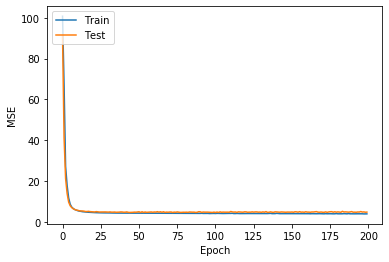

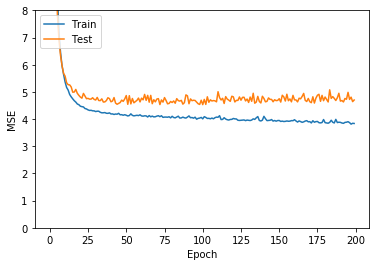

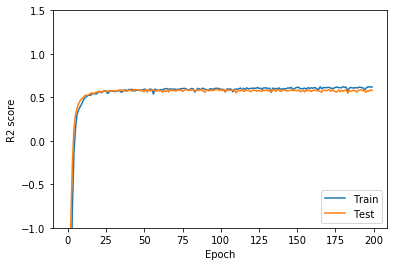

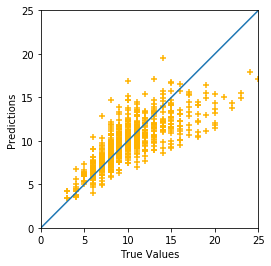

In [127]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 15 - 8 16 32 - 200

In [128]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [129]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [130]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [131]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_67 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_68 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 33        
Total params: 809
Trainable params: 809
Non-trainable params: 0
_________________________________________________________________


In [132]:
epochs = 200
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/200
3341/3341 [==============================] - 1s 261us/sample - loss: 102.2881 - mae: 9.6117 - coeff: -9.4599 - val_loss: 98.9255 - val_mae: 9.3992 - val_coeff: -8.2028
Epoch 2/200
3341/3341 [==============================] - 0s 58us/sample - loss: 85.0372 - mae: 8.6677 - coeff: -7.7632 - val_loss: 76.4039 - val_mae: 8.0892 - val_coeff: -6.1057
Epoch 3/200
3341/3341 [==============================] - 0s 50us/sample - loss: 57.4772 - mae: 6.7884 - coeff: -4.6954 - val_loss: 42.7634 - val_mae: 5.5890 - val_coeff: -2.9613
Epoch 4/200
3341/3341 [==============================] - 0s 50us/sample - loss: 30.0906 - mae: 4.4412 - coeff: -2.0106 - val_loss: 22.8938 - val_mae: 3.7599 - val_coeff: -1.0793
Epoch 5/200
3341/3341 [==============================] - 0s 66us/sample - loss: 20.1656 - mae: 3.3889 - coeff: -1.0605 - val_loss: 17.2262 - val_mae: 3.1249 - val_coeff: -0.5518
Epoch 6/200
3341/3341 [==============================] - 0s 9

3341/3341 [==============================] - 0s 99us/sample - loss: 4.4679 - mae: 1.5043 - coeff: 0.5641 - val_loss: 4.7192 - val_mae: 1.5211 - val_coeff: 0.5762
Epoch 48/200
3341/3341 [==============================] - 0s 116us/sample - loss: 4.4569 - mae: 1.5010 - coeff: 0.5548 - val_loss: 4.7219 - val_mae: 1.5168 - val_coeff: 0.5762
Epoch 49/200
3341/3341 [==============================] - 0s 56us/sample - loss: 4.4328 - mae: 1.4968 - coeff: 0.5523 - val_loss: 4.8104 - val_mae: 1.5235 - val_coeff: 0.5690
Epoch 50/200
3341/3341 [==============================] - 0s 69us/sample - loss: 4.4426 - mae: 1.5002 - coeff: 0.5678 - val_loss: 4.7959 - val_mae: 1.5140 - val_coeff: 0.5701
Epoch 51/200
3341/3341 [==============================] - 0s 99us/sample - loss: 4.4432 - mae: 1.4941 - coeff: 0.5586 - val_loss: 4.8885 - val_mae: 1.5212 - val_coeff: 0.5623
Epoch 52/200
3341/3341 [==============================] - 0s 83us/sample - loss: 4.4292 - mae: 1.4938 - coeff: 0.5670 - val_loss: 4.7657 

Epoch 94/200
3341/3341 [==============================] - 0s 54us/sample - loss: 4.2241 - mae: 1.4638 - coeff: 0.5837 - val_loss: 4.6110 - val_mae: 1.4862 - val_coeff: 0.5850
Epoch 95/200
3341/3341 [==============================] - 0s 45us/sample - loss: 4.2013 - mae: 1.4603 - coeff: 0.5861 - val_loss: 4.6330 - val_mae: 1.4835 - val_coeff: 0.5833
Epoch 96/200
3341/3341 [==============================] - 0s 46us/sample - loss: 4.2036 - mae: 1.4572 - coeff: 0.5872 - val_loss: 4.6305 - val_mae: 1.4853 - val_coeff: 0.5836
Epoch 97/200
3341/3341 [==============================] - 0s 47us/sample - loss: 4.2043 - mae: 1.4638 - coeff: 0.5702 - val_loss: 4.6693 - val_mae: 1.4830 - val_coeff: 0.5804
Epoch 98/200
3341/3341 [==============================] - 0s 45us/sample - loss: 4.2160 - mae: 1.4658 - coeff: 0.5525 - val_loss: 4.8004 - val_mae: 1.4909 - val_coeff: 0.5694
Epoch 99/200
3341/3341 [==============================] - 0s 44us/sample - loss: 4.2476 - mae: 1.4626 - coeff: 0.5816 - val_l

3341/3341 [==============================] - 0s 88us/sample - loss: 4.1461 - mae: 1.4464 - coeff: 0.5742 - val_loss: 4.6864 - val_mae: 1.4759 - val_coeff: 0.5786
Epoch 141/200
3341/3341 [==============================] - 0s 117us/sample - loss: 4.1559 - mae: 1.4535 - coeff: 0.5806 - val_loss: 4.7963 - val_mae: 1.4841 - val_coeff: 0.5692
Epoch 142/200
3341/3341 [==============================] - 0s 59us/sample - loss: 4.1292 - mae: 1.4364 - coeff: 0.5964 - val_loss: 4.5960 - val_mae: 1.4781 - val_coeff: 0.5860
Epoch 143/200
3341/3341 [==============================] - 0s 81us/sample - loss: 4.1186 - mae: 1.4429 - coeff: 0.5927 - val_loss: 4.6066 - val_mae: 1.4760 - val_coeff: 0.5852
Epoch 144/200
3341/3341 [==============================] - 0s 56us/sample - loss: 4.1480 - mae: 1.4449 - coeff: 0.5912 - val_loss: 4.6190 - val_mae: 1.4743 - val_coeff: 0.5841
Epoch 145/200
3341/3341 [==============================] - 0s 55us/sample - loss: 4.1144 - mae: 1.4367 - coeff: 0.5938 - val_loss: 4.

3341/3341 [==============================] - 0s 55us/sample - loss: 4.0653 - mae: 1.4222 - coeff: 0.5829 - val_loss: 4.5169 - val_mae: 1.4873 - val_coeff: 0.5917
Epoch 187/200
3341/3341 [==============================] - 0s 62us/sample - loss: 4.0858 - mae: 1.4341 - coeff: 0.4687 - val_loss: 4.5440 - val_mae: 1.4786 - val_coeff: 0.5896
Epoch 188/200
3341/3341 [==============================] - 0s 51us/sample - loss: 4.0666 - mae: 1.4255 - coeff: 0.5832 - val_loss: 4.6906 - val_mae: 1.4776 - val_coeff: 0.5774
Epoch 189/200
3341/3341 [==============================] - 0s 126us/sample - loss: 4.0999 - mae: 1.4280 - coeff: 0.5915 - val_loss: 4.7118 - val_mae: 1.4792 - val_coeff: 0.5757
Epoch 190/200
3341/3341 [==============================] - 1s 186us/sample - loss: 4.0581 - mae: 1.4290 - coeff: 0.5768 - val_loss: 4.6305 - val_mae: 1.4862 - val_coeff: 0.5829
Epoch 191/200
3341/3341 [==============================] - 0s 82us/sample - loss: 4.0829 - mae: 1.4277 - coeff: 0.5992 - val_loss: 4

In [133]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [134]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.568547412235215
RMSE :      2.1374160596933898
r2_score :  0.5928812007616258


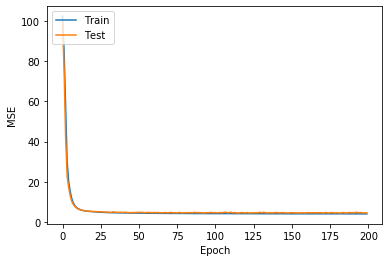

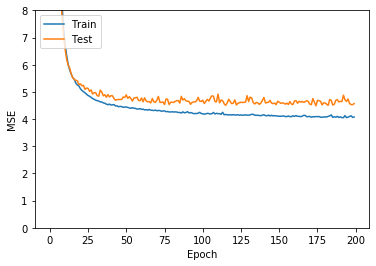

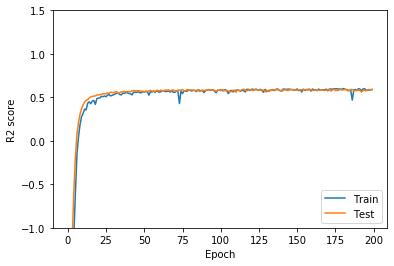

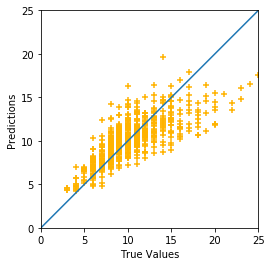

In [135]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 00 final 2

In [152]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [153]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [154]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [155]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_78 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_79 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 65        
Total params: 2,897
Trainable params: 2,897
Non-trainable params: 0
_________________________________________________________________


In [156]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 309us/sample - loss: 91.4431 - mae: 9.0118 - coeff: -8.1194 - val_loss: 77.6424 - val_mae: 8.1576 - val_coeff: -6.2172
Epoch 2/300
3341/3341 [==============================] - 0s 62us/sample - loss: 50.4315 - mae: 6.2297 - coeff: -3.9899 - val_loss: 26.6010 - val_mae: 4.1816 - val_coeff: -1.4411
Epoch 3/300
3341/3341 [==============================] - 0s 68us/sample - loss: 20.8891 - mae: 3.4750 - coeff: -1.0892 - val_loss: 15.5993 - val_mae: 3.0166 - val_coeff: -0.4013
Epoch 4/300
3341/3341 [==============================] - 0s 60us/sample - loss: 12.7895 - mae: 2.5460 - coeff: -0.2690 - val_loss: 8.9012 - val_mae: 2.1242 - val_coeff: 0.2132
Epoch 5/300
3341/3341 [==============================] - 0s 79us/sample - loss: 8.2042 - mae: 1.9212 - coeff: 0.1935 - val_loss: 6.7979 - val_mae: 1.7772 - val_coeff: 0.3979
Epoch 6/300
3341/3341 [==============================] - 0s 53us/sam

3341/3341 [==============================] - 0s 48us/sample - loss: 4.2989 - mae: 1.4837 - coeff: 0.5665 - val_loss: 4.5979 - val_mae: 1.5227 - val_coeff: 0.5860
Epoch 48/300
3341/3341 [==============================] - 0s 51us/sample - loss: 4.2652 - mae: 1.4720 - coeff: 0.5651 - val_loss: 4.5697 - val_mae: 1.5373 - val_coeff: 0.5878
Epoch 49/300
3341/3341 [==============================] - 0s 50us/sample - loss: 4.2657 - mae: 1.4791 - coeff: 0.5697 - val_loss: 4.6887 - val_mae: 1.5159 - val_coeff: 0.5786
Epoch 50/300
3341/3341 [==============================] - 0s 49us/sample - loss: 4.2653 - mae: 1.4734 - coeff: 0.5740 - val_loss: 4.6954 - val_mae: 1.5332 - val_coeff: 0.5776
Epoch 51/300
3341/3341 [==============================] - 0s 61us/sample - loss: 4.2505 - mae: 1.4747 - coeff: 0.5427 - val_loss: 4.6965 - val_mae: 1.5166 - val_coeff: 0.5777
Epoch 52/300
3341/3341 [==============================] - 0s 53us/sample - loss: 4.2633 - mae: 1.4682 - coeff: 0.5720 - val_loss: 4.7730 -

Epoch 94/300
3341/3341 [==============================] - 0s 68us/sample - loss: 4.1607 - mae: 1.4599 - coeff: 0.5924 - val_loss: 4.5624 - val_mae: 1.5145 - val_coeff: 0.5868
Epoch 95/300
3341/3341 [==============================] - 0s 64us/sample - loss: 4.1640 - mae: 1.4649 - coeff: 0.5825 - val_loss: 4.5718 - val_mae: 1.5093 - val_coeff: 0.5865
Epoch 96/300
3341/3341 [==============================] - 0s 67us/sample - loss: 4.1015 - mae: 1.4420 - coeff: 0.5961 - val_loss: 4.5633 - val_mae: 1.5136 - val_coeff: 0.5869
Epoch 97/300
3341/3341 [==============================] - 0s 52us/sample - loss: 4.1028 - mae: 1.4393 - coeff: 0.5941 - val_loss: 4.6738 - val_mae: 1.5139 - val_coeff: 0.5782
Epoch 98/300
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1095 - mae: 1.4498 - coeff: 0.5982 - val_loss: 4.6158 - val_mae: 1.5109 - val_coeff: 0.5828
Epoch 99/300
3341/3341 [==============================] - 0s 90us/sample - loss: 4.1290 - mae: 1.4530 - coeff: 0.5871 - val_l

3341/3341 [==============================] - 0s 62us/sample - loss: 4.0459 - mae: 1.4436 - coeff: 0.5933 - val_loss: 4.5976 - val_mae: 1.4986 - val_coeff: 0.5837
Epoch 141/300
3341/3341 [==============================] - 0s 50us/sample - loss: 4.0282 - mae: 1.4359 - coeff: 0.5951 - val_loss: 4.5940 - val_mae: 1.5055 - val_coeff: 0.5837
Epoch 142/300
3341/3341 [==============================] - 0s 53us/sample - loss: 3.9879 - mae: 1.4245 - coeff: 0.6007 - val_loss: 4.6850 - val_mae: 1.5065 - val_coeff: 0.5760
Epoch 143/300
3341/3341 [==============================] - 0s 49us/sample - loss: 4.0163 - mae: 1.4290 - coeff: 0.6039 - val_loss: 4.5642 - val_mae: 1.5000 - val_coeff: 0.5865
Epoch 144/300
3341/3341 [==============================] - 0s 52us/sample - loss: 4.0071 - mae: 1.4247 - coeff: 0.6096 - val_loss: 4.6770 - val_mae: 1.5071 - val_coeff: 0.5764
Epoch 145/300
3341/3341 [==============================] - 0s 55us/sample - loss: 4.0433 - mae: 1.4377 - coeff: 0.6030 - val_loss: 4.4

3341/3341 [==============================] - 0s 72us/sample - loss: 3.9350 - mae: 1.4138 - coeff: 0.6092 - val_loss: 4.5766 - val_mae: 1.4961 - val_coeff: 0.5847
Epoch 187/300
3341/3341 [==============================] - 0s 66us/sample - loss: 3.9247 - mae: 1.4123 - coeff: 0.5934 - val_loss: 4.4799 - val_mae: 1.4980 - val_coeff: 0.5925
Epoch 188/300
3341/3341 [==============================] - 0s 52us/sample - loss: 3.9161 - mae: 1.4125 - coeff: 0.5986 - val_loss: 4.5180 - val_mae: 1.5019 - val_coeff: 0.5898
Epoch 189/300
3341/3341 [==============================] - 0s 56us/sample - loss: 3.9823 - mae: 1.4270 - coeff: 0.5975 - val_loss: 4.6911 - val_mae: 1.4998 - val_coeff: 0.5751
Epoch 190/300
3341/3341 [==============================] - 0s 50us/sample - loss: 3.9489 - mae: 1.4199 - coeff: 0.5780 - val_loss: 4.6522 - val_mae: 1.4978 - val_coeff: 0.5778
Epoch 191/300
3341/3341 [==============================] - 0s 58us/sample - loss: 3.9430 - mae: 1.4201 - coeff: 0.6018 - val_loss: 4.7

3341/3341 [==============================] - 0s 56us/sample - loss: 3.8943 - mae: 1.4169 - coeff: 0.6104 - val_loss: 4.4999 - val_mae: 1.5029 - val_coeff: 0.5902
Epoch 233/300
3341/3341 [==============================] - 0s 66us/sample - loss: 3.8786 - mae: 1.4162 - coeff: 0.6155 - val_loss: 4.6469 - val_mae: 1.4947 - val_coeff: 0.5783
Epoch 234/300
3341/3341 [==============================] - 0s 55us/sample - loss: 3.8602 - mae: 1.4050 - coeff: 0.6095 - val_loss: 4.6814 - val_mae: 1.4959 - val_coeff: 0.5750
Epoch 235/300
3341/3341 [==============================] - 0s 74us/sample - loss: 3.8959 - mae: 1.4050 - coeff: 0.6054 - val_loss: 4.4994 - val_mae: 1.5032 - val_coeff: 0.5905
Epoch 236/300
3341/3341 [==============================] - 0s 69us/sample - loss: 3.8507 - mae: 1.4066 - coeff: 0.6134 - val_loss: 4.7267 - val_mae: 1.5036 - val_coeff: 0.5713
Epoch 237/300
3341/3341 [==============================] - 0s 50us/sample - loss: 3.8900 - mae: 1.4148 - coeff: 0.6112 - val_loss: 4.7

3341/3341 [==============================] - 0s 72us/sample - loss: 3.7775 - mae: 1.3950 - coeff: 0.6108 - val_loss: 4.8102 - val_mae: 1.5161 - val_coeff: 0.5635
Epoch 279/300
3341/3341 [==============================] - 0s 60us/sample - loss: 3.8328 - mae: 1.4033 - coeff: 0.6238 - val_loss: 4.6198 - val_mae: 1.4948 - val_coeff: 0.5799
Epoch 280/300
3341/3341 [==============================] - 0s 62us/sample - loss: 3.7721 - mae: 1.3849 - coeff: 0.6183 - val_loss: 4.5466 - val_mae: 1.5022 - val_coeff: 0.5856
Epoch 281/300
3341/3341 [==============================] - 0s 53us/sample - loss: 3.7801 - mae: 1.3952 - coeff: 0.6279 - val_loss: 4.6053 - val_mae: 1.4936 - val_coeff: 0.5804
Epoch 282/300
3341/3341 [==============================] - 0s 67us/sample - loss: 3.7784 - mae: 1.3847 - coeff: 0.6196 - val_loss: 4.4762 - val_mae: 1.5102 - val_coeff: 0.5902
Epoch 283/300
3341/3341 [==============================] - 0s 53us/sample - loss: 3.8116 - mae: 1.3883 - coeff: 0.6045 - val_loss: 4.5

In [157]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [158]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.676145094610449
RMSE :      2.162439616407924
r2_score :  0.5832928053053105


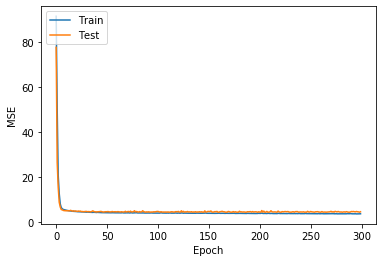

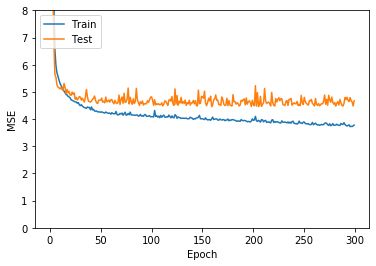

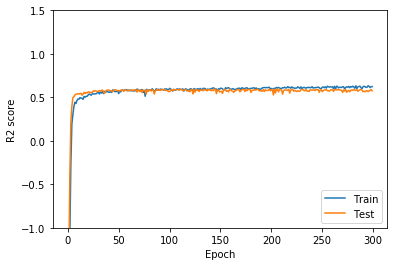

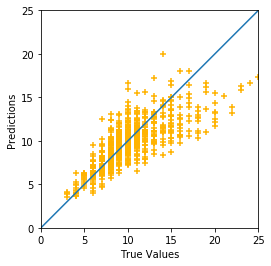

In [159]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## 00 final 2

In [160]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [161]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [162]:
from tensorflow.keras import backend as K

def coeff(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred)) 
    SS_tot = K.sum(K.square(y_true-K.mean(y_true))) 
    return (1 - SS_res/(SS_tot+K.epsilon()))

model.compile(optimizer='adam', loss='mse', metrics=['mae', coeff])

In [163]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_82 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_83 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [164]:
epochs = 300
batch_size=128

history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test_scaled, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/300
3341/3341 [==============================] - 1s 436us/sample - loss: 79.3256 - mae: 8.1680 - coeff: -6.8986 - val_loss: 43.4778 - val_mae: 5.6459 - val_coeff: -3.0286
Epoch 2/300
3341/3341 [==============================] - 0s 84us/sample - loss: 27.2182 - mae: 4.0505 - coeff: -1.6950 - val_loss: 17.4659 - val_mae: 3.1523 - val_coeff: -0.5789
Epoch 3/300
3341/3341 [==============================] - 0s 111us/sample - loss: 13.7253 - mae: 2.5823 - coeff: -0.3949 - val_loss: 8.9802 - val_mae: 2.1869 - val_coeff: 0.1992
Epoch 4/300
3341/3341 [==============================] - 0s 132us/sample - loss: 8.7295 - mae: 1.9767 - coeff: 0.1476 - val_loss: 7.1101 - val_mae: 1.8758 - val_coeff: 0.3650
Epoch 5/300
3341/3341 [==============================] - 0s 85us/sample - loss: 7.0166 - mae: 1.7920 - coeff: 0.3131 - val_loss: 6.7230 - val_mae: 1.7800 - val_coeff: 0.3999
Epoch 6/300
3341/3341 [==============================] - 0s 82us/sampl

3341/3341 [==============================] - 0s 53us/sample - loss: 4.0956 - mae: 1.4392 - coeff: 0.5929 - val_loss: 4.7001 - val_mae: 1.5038 - val_coeff: 0.5773
Epoch 48/300
3341/3341 [==============================] - 0s 57us/sample - loss: 4.1008 - mae: 1.4361 - coeff: 0.5848 - val_loss: 4.5716 - val_mae: 1.5093 - val_coeff: 0.5869
Epoch 49/300
3341/3341 [==============================] - 0s 70us/sample - loss: 4.1136 - mae: 1.4408 - coeff: 0.5801 - val_loss: 4.7486 - val_mae: 1.5133 - val_coeff: 0.5728
Epoch 50/300
3341/3341 [==============================] - 0s 53us/sample - loss: 4.1056 - mae: 1.4466 - coeff: 0.5960 - val_loss: 4.8265 - val_mae: 1.5085 - val_coeff: 0.5658
Epoch 51/300
3341/3341 [==============================] - 0s 55us/sample - loss: 4.1563 - mae: 1.4565 - coeff: 0.5899 - val_loss: 4.6909 - val_mae: 1.5155 - val_coeff: 0.5779
Epoch 52/300
3341/3341 [==============================] - 0s 56us/sample - loss: 4.0906 - mae: 1.4354 - coeff: 0.5896 - val_loss: 4.5594 -

Epoch 94/300
3341/3341 [==============================] - 0s 77us/sample - loss: 4.0171 - mae: 1.4436 - coeff: 0.6001 - val_loss: 4.7672 - val_mae: 1.5010 - val_coeff: 0.5722
Epoch 95/300
3341/3341 [==============================] - 0s 102us/sample - loss: 3.8892 - mae: 1.4045 - coeff: 0.6197 - val_loss: 4.7237 - val_mae: 1.4978 - val_coeff: 0.5759
Epoch 96/300
3341/3341 [==============================] - 0s 72us/sample - loss: 3.9885 - mae: 1.4309 - coeff: 0.5908 - val_loss: 5.0049 - val_mae: 1.5233 - val_coeff: 0.5513
Epoch 97/300
3341/3341 [==============================] - 0s 73us/sample - loss: 4.0213 - mae: 1.4269 - coeff: 0.5985 - val_loss: 4.7217 - val_mae: 1.4922 - val_coeff: 0.5762
Epoch 98/300
3341/3341 [==============================] - 0s 56us/sample - loss: 3.8908 - mae: 1.3957 - coeff: 0.6232 - val_loss: 4.5722 - val_mae: 1.5003 - val_coeff: 0.5878
Epoch 99/300
3341/3341 [==============================] - 0s 59us/sample - loss: 3.8599 - mae: 1.3987 - coeff: 0.6122 - val_

3341/3341 [==============================] - 0s 55us/sample - loss: 3.7209 - mae: 1.3812 - coeff: 0.6379 - val_loss: 4.8322 - val_mae: 1.4970 - val_coeff: 0.5671
Epoch 141/300
3341/3341 [==============================] - 0s 75us/sample - loss: 3.7086 - mae: 1.3781 - coeff: 0.6094 - val_loss: 5.1191 - val_mae: 1.5371 - val_coeff: 0.5426
Epoch 142/300
3341/3341 [==============================] - 0s 62us/sample - loss: 3.7666 - mae: 1.3888 - coeff: 0.6281 - val_loss: 4.6365 - val_mae: 1.4956 - val_coeff: 0.5825
Epoch 143/300
3341/3341 [==============================] - 0s 73us/sample - loss: 3.7349 - mae: 1.3875 - coeff: 0.6338 - val_loss: 4.7545 - val_mae: 1.5001 - val_coeff: 0.5742
Epoch 144/300
3341/3341 [==============================] - 0s 64us/sample - loss: 3.7479 - mae: 1.3907 - coeff: 0.6336 - val_loss: 4.8316 - val_mae: 1.5360 - val_coeff: 0.5656
Epoch 145/300
3341/3341 [==============================] - 0s 76us/sample - loss: 3.7249 - mae: 1.3864 - coeff: 0.5958 - val_loss: 4.6

3341/3341 [==============================] - 0s 73us/sample - loss: 3.6096 - mae: 1.3685 - coeff: 0.6290 - val_loss: 4.9118 - val_mae: 1.5084 - val_coeff: 0.5601
Epoch 187/300
3341/3341 [==============================] - 0s 69us/sample - loss: 3.6237 - mae: 1.3688 - coeff: 0.6338 - val_loss: 4.7565 - val_mae: 1.5119 - val_coeff: 0.5708
Epoch 188/300
3341/3341 [==============================] - 0s 83us/sample - loss: 3.5641 - mae: 1.3603 - coeff: 0.6444 - val_loss: 4.9066 - val_mae: 1.5139 - val_coeff: 0.5607
Epoch 189/300
3341/3341 [==============================] - 0s 60us/sample - loss: 3.6572 - mae: 1.3950 - coeff: 0.6386 - val_loss: 5.0397 - val_mae: 1.5203 - val_coeff: 0.5503
Epoch 190/300
3341/3341 [==============================] - 0s 71us/sample - loss: 3.5169 - mae: 1.3512 - coeff: 0.6410 - val_loss: 5.0253 - val_mae: 1.5217 - val_coeff: 0.5507
Epoch 191/300
3341/3341 [==============================] - 0s 78us/sample - loss: 3.5487 - mae: 1.3578 - coeff: 0.6175 - val_loss: 5.0

3341/3341 [==============================] - 0s 50us/sample - loss: 3.4351 - mae: 1.3465 - coeff: 0.6626 - val_loss: 4.9908 - val_mae: 1.5296 - val_coeff: 0.5518
Epoch 233/300
3341/3341 [==============================] - 0s 55us/sample - loss: 3.3693 - mae: 1.3321 - coeff: 0.6504 - val_loss: 5.1637 - val_mae: 1.5435 - val_coeff: 0.5396
Epoch 234/300
3341/3341 [==============================] - 0s 56us/sample - loss: 3.4413 - mae: 1.3503 - coeff: 0.6632 - val_loss: 5.0867 - val_mae: 1.5324 - val_coeff: 0.5443
Epoch 235/300
3341/3341 [==============================] - 0s 65us/sample - loss: 3.3252 - mae: 1.3220 - coeff: 0.6693 - val_loss: 5.1870 - val_mae: 1.5699 - val_coeff: 0.5344
Epoch 236/300
3341/3341 [==============================] - 0s 52us/sample - loss: 3.4416 - mae: 1.3458 - coeff: 0.6506 - val_loss: 5.0645 - val_mae: 1.5557 - val_coeff: 0.5454
Epoch 237/300
3341/3341 [==============================] - 0s 55us/sample - loss: 3.4724 - mae: 1.3586 - coeff: 0.6511 - val_loss: 5.0

3341/3341 [==============================] - 0s 48us/sample - loss: 3.2140 - mae: 1.3095 - coeff: 0.6789 - val_loss: 5.3790 - val_mae: 1.5792 - val_coeff: 0.5177
Epoch 279/300
3341/3341 [==============================] - 0s 65us/sample - loss: 3.2022 - mae: 1.2980 - coeff: 0.6855 - val_loss: 5.1816 - val_mae: 1.5498 - val_coeff: 0.5355
Epoch 280/300
3341/3341 [==============================] - 0s 63us/sample - loss: 3.1801 - mae: 1.2944 - coeff: 0.6689 - val_loss: 5.2525 - val_mae: 1.5586 - val_coeff: 0.5298
Epoch 281/300
3341/3341 [==============================] - 0s 59us/sample - loss: 3.2331 - mae: 1.3099 - coeff: 0.6815 - val_loss: 5.0242 - val_mae: 1.5411 - val_coeff: 0.5494
Epoch 282/300
3341/3341 [==============================] - 0s 72us/sample - loss: 3.2703 - mae: 1.3236 - coeff: 0.6642 - val_loss: 5.0194 - val_mae: 1.5715 - val_coeff: 0.5486
Epoch 283/300
3341/3341 [==============================] - 0s 54us/sample - loss: 3.1930 - mae: 1.3074 - coeff: 0.6784 - val_loss: 5.1

In [165]:
y_pred = model.predict(X_test_scaled)

## Evaluate

In [166]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.2316585022795365
RMSE :      2.287281902669528
r2_score :  0.5337891160395785


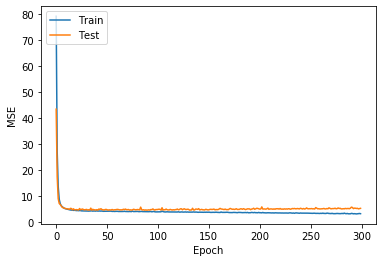

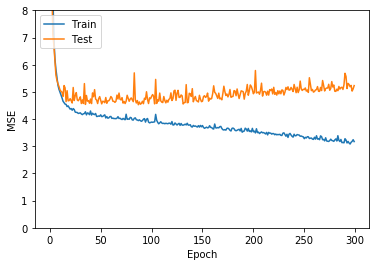

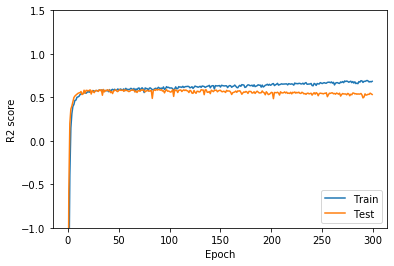

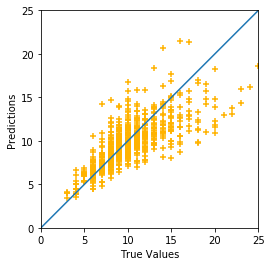

In [167]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim((0,8))
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['coeff'])
plt.plot(history.history['val_coeff'])
plt.ylabel('R2 score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim((-1,1.5))
plt.show()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, c=[(1, 0.7, 0.0),], marker='+')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)